In [319]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [320]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [321]:
data_path = r"C:\Users\HP\Desktop\Springboard\data.csv"

In [322]:
dataset = pd.read_csv(r"C:\Users\HP\Desktop\Internship\day.csv", encoding= 'unicode_escape')


## DATA INSPECTION

In [323]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [324]:
dataset.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [325]:
dataset.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [326]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [327]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [328]:
dataset.describe(include = 'all')

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

In [329]:
dataset.describe(include = "all").T

count unique         top freq         mean          std       min  \
instant     731.0    NaN         NaN  NaN        366.0   211.165812       1.0   
dteday        731    731  2011-01-01    1          NaN          NaN       NaN   
season      731.0    NaN         NaN  NaN      2.49658     1.110807       1.0   
yr          731.0    NaN         NaN  NaN     0.500684     0.500342       0.0   
mnth        731.0    NaN         NaN  NaN     6.519836     3.451913       1.0   
holiday     731.0    NaN         NaN  NaN     0.028728     0.167155       0.0   
weekday     731.0    NaN         NaN  NaN     2.997264     2.004787       0.0   
workingday  731.0    NaN         NaN  NaN     0.683995     0.465233       0.0   
weathersit  731.0    NaN         NaN  NaN     1.395349     0.544894       1.0   
temp        731.0    NaN         NaN  NaN     0.495385     0.183051   0.05913   
atemp       731.0    NaN         NaN  NaN     0.474354     0.162961   0.07907   
hum         731.0    NaN         NaN  NaN     0.627894     0.142429       0.0   
windspeed   731.0    NaN         NaN  NaN     0.190486     0.077498  0.022392   
casual      731.0    NaN         NaN  NaN   848.176471   686.622488       2.0   
registered  731.0    NaN         NaN  NaN  3656.172367  1560.256377      20.0   
cnt         731.0    NaN         NaN  NaN  4504.348837  1937.211452      22.0   

                 25%       50%       75%       max  
instant        183.5     366.0     548.5     731.0  
dteday           NaN       NaN       NaN       NaN  
season           2.0       3.0       3.0       4.0  
yr               0.0       1.0       1.0       1.0  
mnth             4.0       7.0      10.0      12.0  
holiday          0.0       0.0       0.0       1.0  
weekday          1.0       3.0       5.0       6.0  
workingday       0.0       1.0       1.0       1.0  
weathersit       1.0       1.0       2.0       3.0  
temp        0.337083  0.498333  0.655417  0.861667  
atemp       0.337842  0.486733  0.608602  0.840896  
hum             0.52  0.626667  0.730209    0.9725  
windspeed    0.13495  0.180975  0.233214  0.507463  
casual         315.5     713.0    1096.0    3410.0  
registered    2497.0    3662.0    4776.5    6946.0  
cnt           3152.0    4548.0    5956.0    8714.0

In [330]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [331]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [332]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [333]:
dataset['Month'] = dataset['dteday'].dt.month

dataset['Day'] = dataset['dteday'].dt.day_name()    

In [334]:
dataset['Weekdays_or_weekend'] = dataset['dteday'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [335]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   dteday               731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   yr                   731 non-null    int64         
 4   mnth                 731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weathersit           731 non-null    int64         
 9   temp                 731 non-null    float64       
 10  atemp                731 non-null    float64       
 11  hum                  731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual               731 non-null  

In [336]:
dataset.head(2)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   

   cnt  Month       Day  Weekdays_or_weekend  
0  985      1  Saturday                    0  
1  801      1    Sunday                    0

In [337]:
dataset.drop(['dteday',"Day","instant","atemp","casual","registered","Weekdays_or_weekend","mnth"],axis=1 ,inplace=True)

In [338]:
dataset.head(2)

season  yr  holiday  weekday  workingday  weathersit      temp       hum  \
0       1   0        0        6           0           2  0.344167  0.805833   
1       1   0        0        0           0           2  0.363478  0.696087   

   windspeed  cnt  Month  
0   0.160446  985      1  
1   0.248539  801      1

In [339]:
dataset['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [340]:
dataset['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [341]:
dataset['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [342]:
dataset['Month'].value_counts()

Month
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [343]:
dataset.describe()

season          yr     holiday     weekday  workingday  weathersit  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    0.028728    2.997264    0.683995    1.395349   
std      1.110807    0.500342    0.167155    2.004787    0.465233    0.544894   
min      1.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%      2.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
50%      3.000000    1.000000    0.000000    3.000000    1.000000    1.000000   
75%      3.000000    1.000000    0.000000    5.000000    1.000000    2.000000   
max      4.000000    1.000000    1.000000    6.000000    1.000000    3.000000   

             temp         hum   windspeed          cnt       Month  
count  731.000000  731.000000  731.000000   731.000000  731.000000  
mean     0.495385    0.627894    0.190486  4504.348837    6.519836  
std      0.183051    0.142429    0.077498  1937.211452    3.451913  
min      0.059130    0.000000    0.022392    22.000000    1.000000  
25%      0.337083    0.520000    0.134950  3152.000000    4.000000  
50%      0.498333    0.626667    0.180975  4548.000000    7.000000  
75%      0.655417    0.730209    0.233214  5956.000000   10.000000  
max      0.861667    0.972500    0.507463  8714.000000   12.000000

In [344]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


## Exploratory Data Analysis


In [345]:
numeric_features = dataset.describe().columns
numeric_features

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt', 'Month'],
      dtype='object')

In [346]:
categorical_columns = list(set(dataset.columns) - set(numeric_features))
categorical_columns

[]

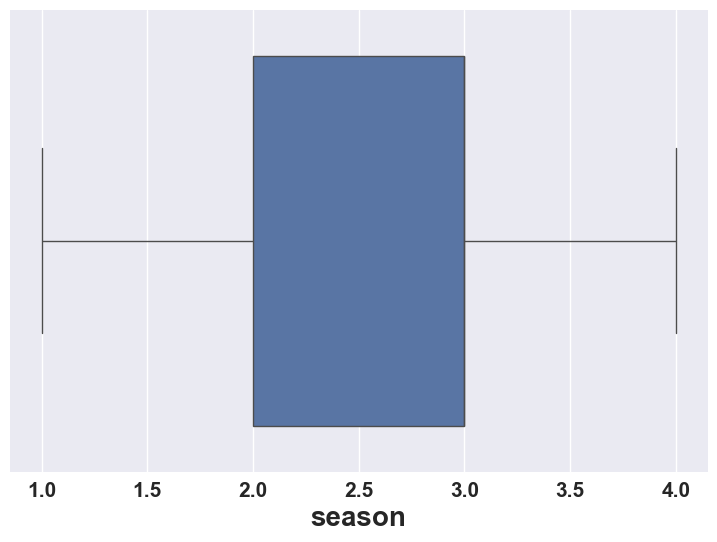

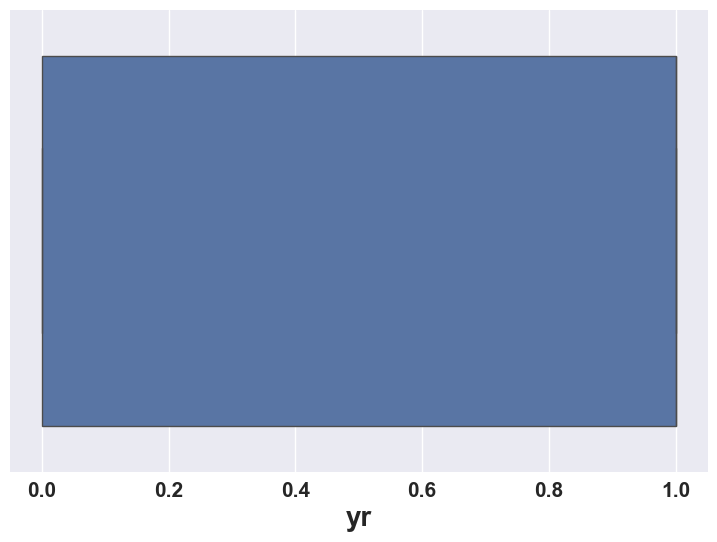

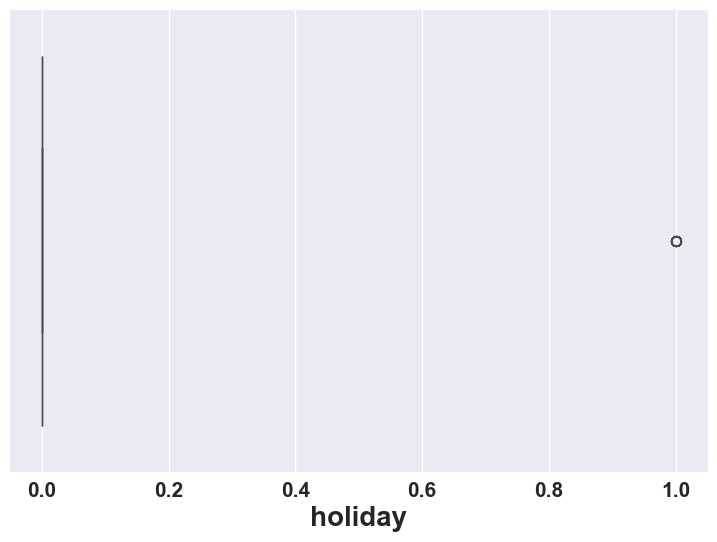

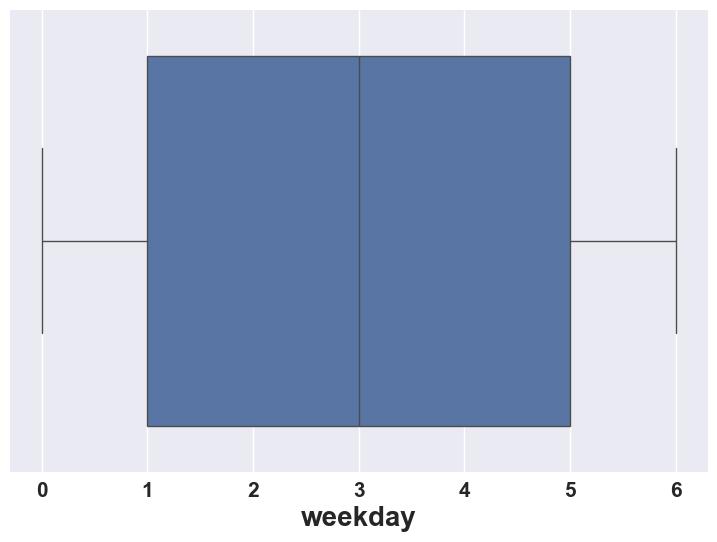

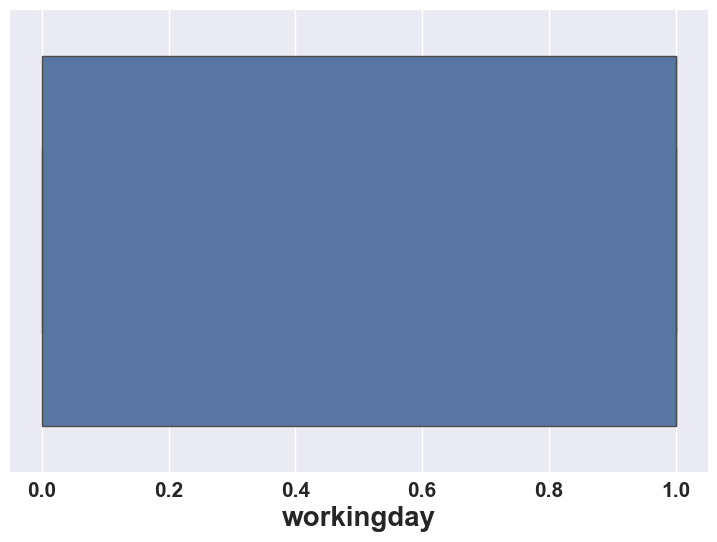

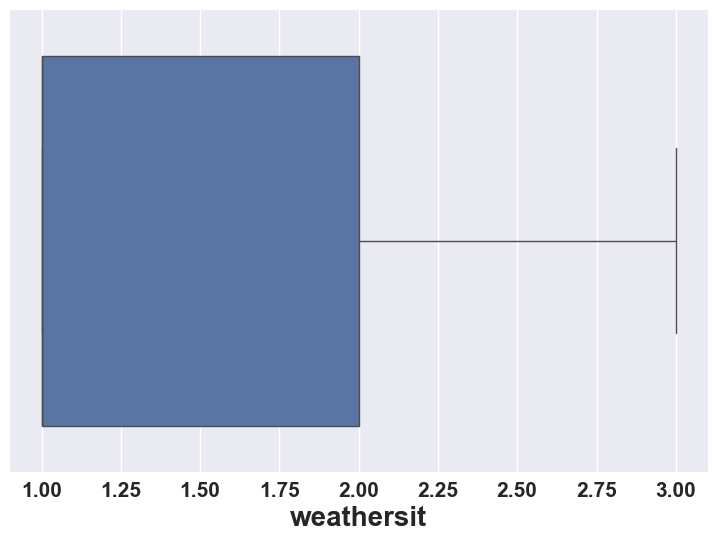

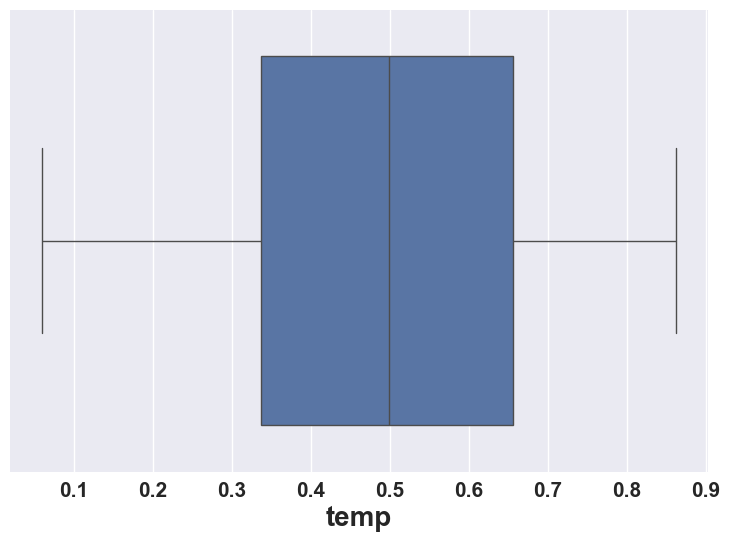

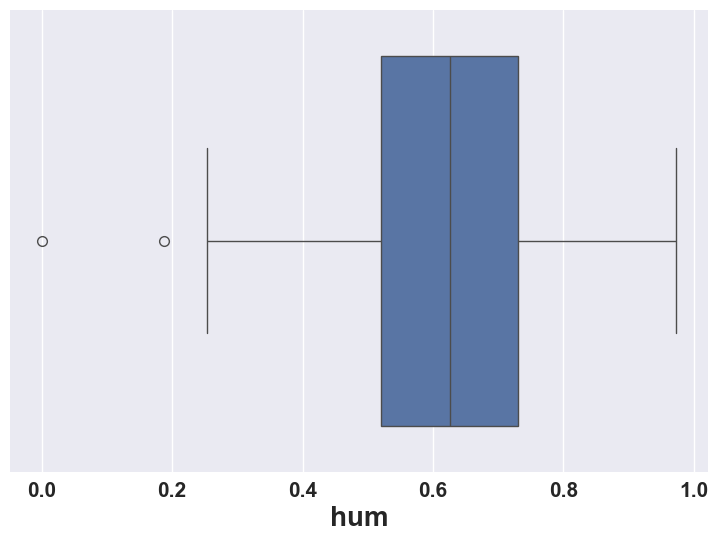

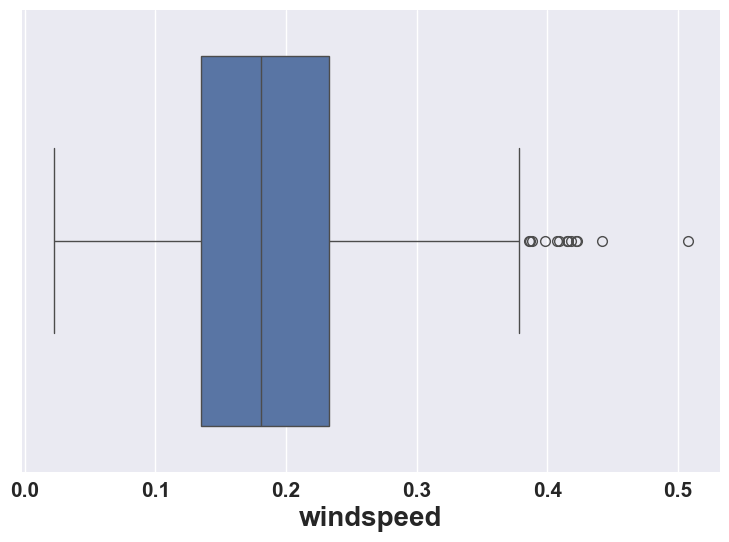

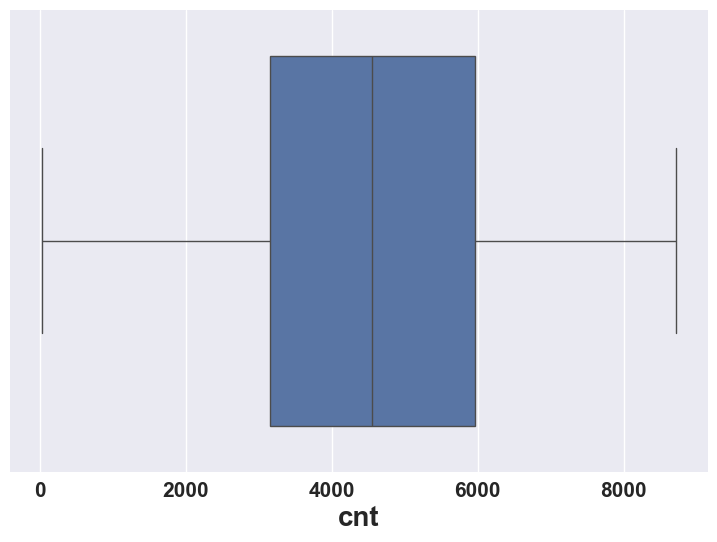

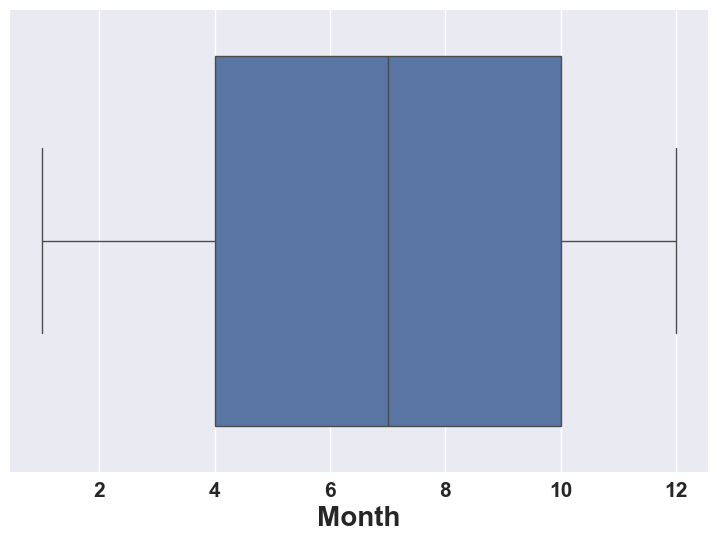

In [347]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

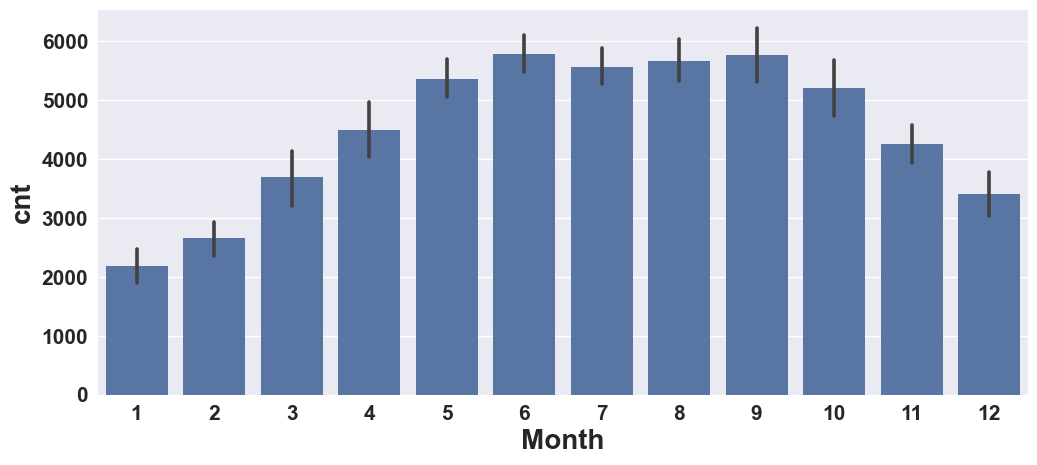

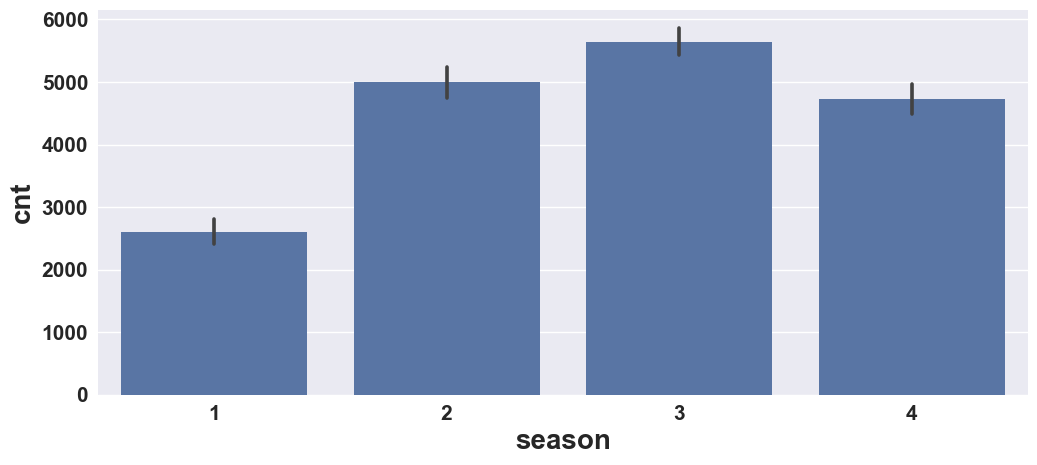

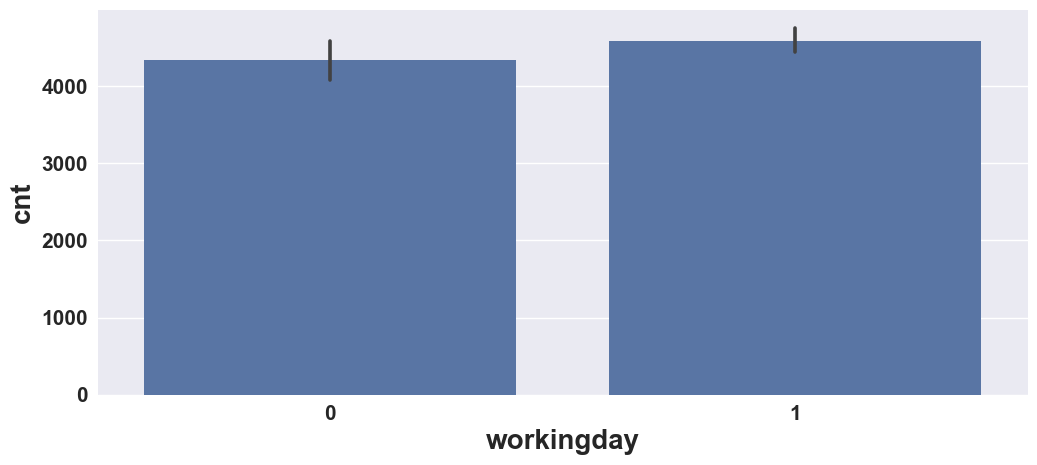

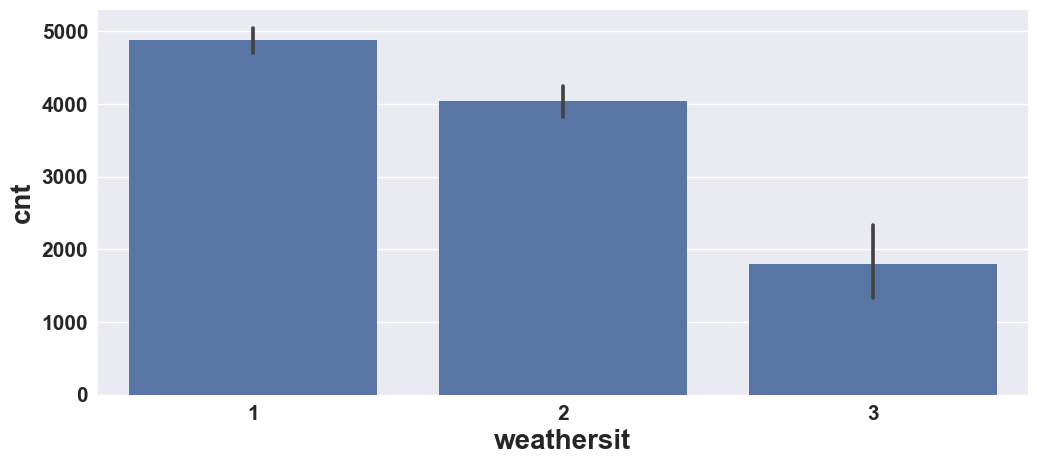

In [348]:
categorical_columns.extend(['Month','season','workingday', 'weathersit'])

for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

## Observations from Above Charts :-

*  From March Bike Rent Count started increasing and it was highest in June.
*  Fall season had the higest Bike Rent Count. People are more likely to rent bikes in Fall. Bike rentals in Spring is very less compared to other seasons.
*  Most of the bikes were rented on Weekdays compared to weekends.
*  High number of bikes are rented in Clear, Few clouds, Partly cloudy, Partly cloudy weather situations .

## Dependent Variable (Bike Rent Count) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Holiday / No Holiday')

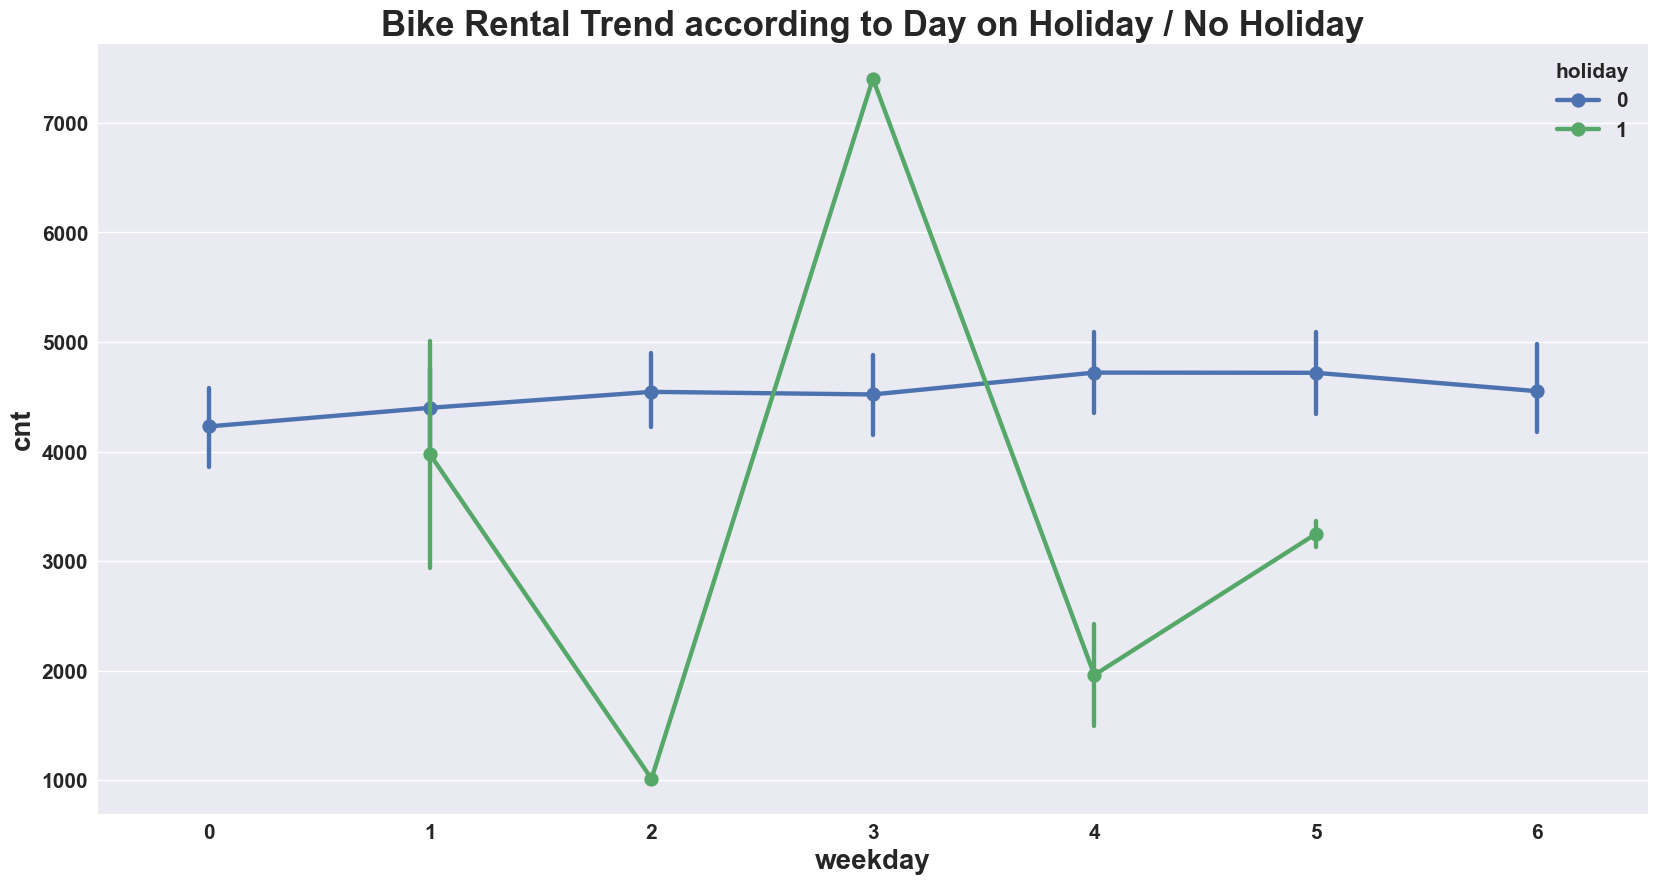

In [349]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['holiday'])
plt.title("Bike Rental Trend according to Day on Holiday / No Holiday")

### Observations :-
*  On non-holidays, bike rentals remain steady throughout the week — likely due to regular office or college commuters.
*  On holidays, rentals fluctuate sharply, showing less consistent usage — probably because people travel for leisure or special plans rather than routine.
*  There’s a huge spike on weekday 3 (holiday = 1) — could be due to a special event or mid-week holiday, leading to higher recreational rides.
*  On most other holidays, rentals are lower than normal weekdays, indicating less commuting activity.
*  Overall, non-holidays show stable patterns, while holidays show unpredictable spikes and drops in bike usage.

Text(0.5, 1.0, 'Bike Rental Trend according to day on Working day / No Working day')

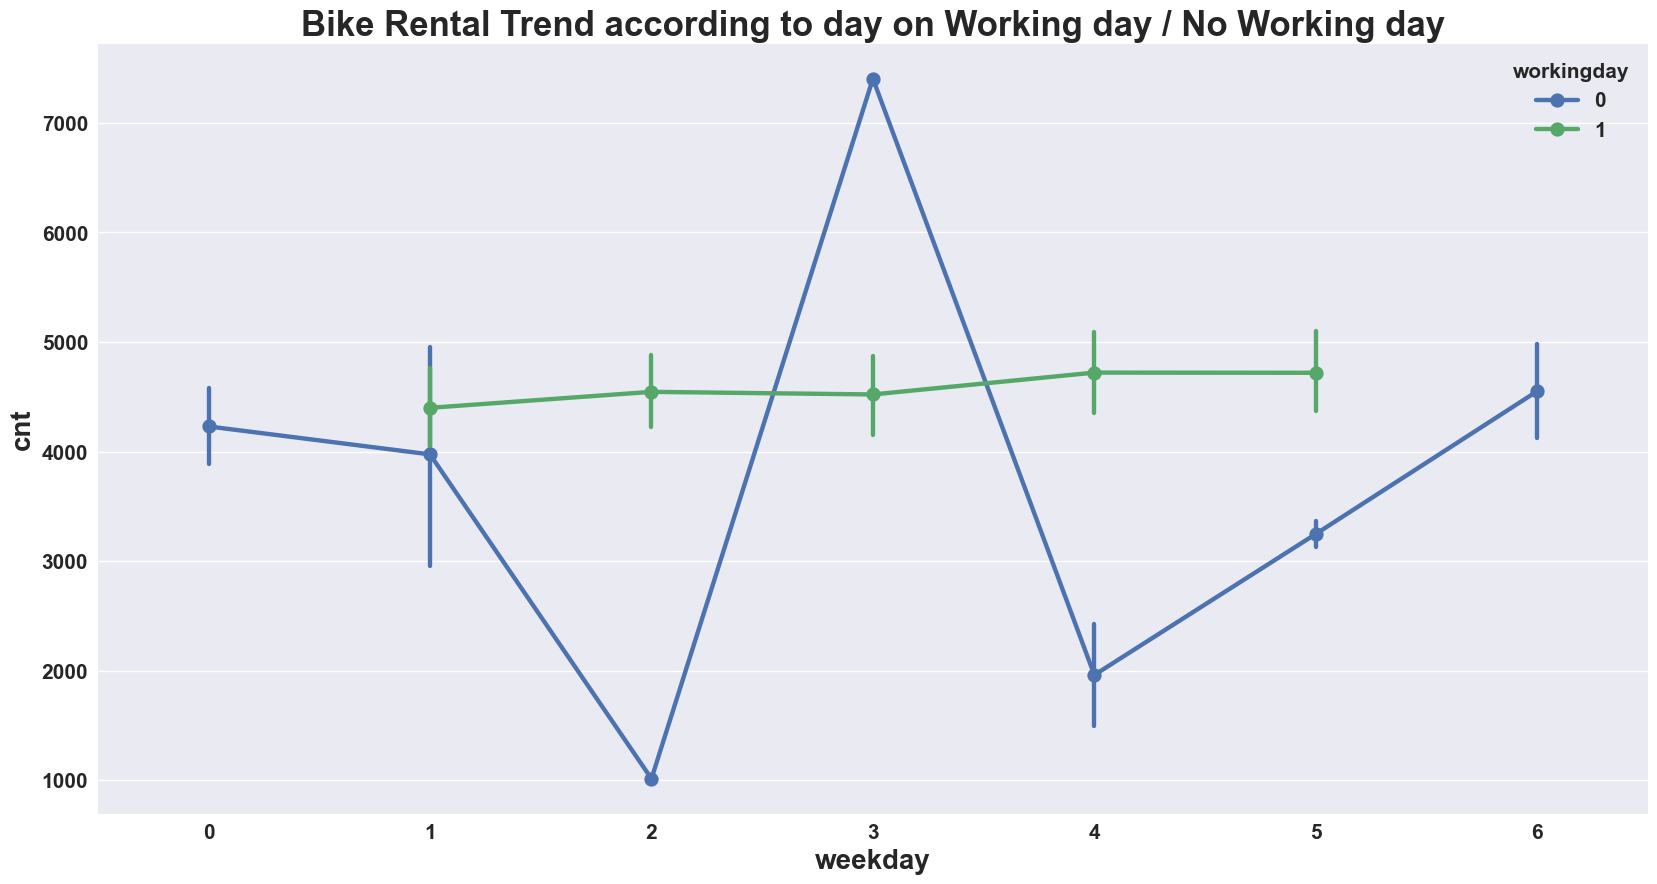

In [350]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to day on Working day / No Working day")

### Observations :-
*  On working days (green line = 1), the number of bike rentals stays fairly consistent throughout the week, showing that people use bikes regularly for office or college commutes.
*  On non-working days (blue line = 0), the rental trend is highly variable — some days have very low counts, while others show sharp spikes.
*  A significant peak appears around weekday 3 (non-working day) — this could be due to weekend outings or special events leading to more leisure rides.
*  Rentals drop sharply on weekday 2 and weekday 4 (non-working days), suggesting less outdoor activity or unfavorable conditions on those days.
*  Overall, working days show stable, moderate rentals, while non-working days show unpredictable patterns — indicating that commuting drives steady demand, whereas leisure usage varies by day.

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Seasons')

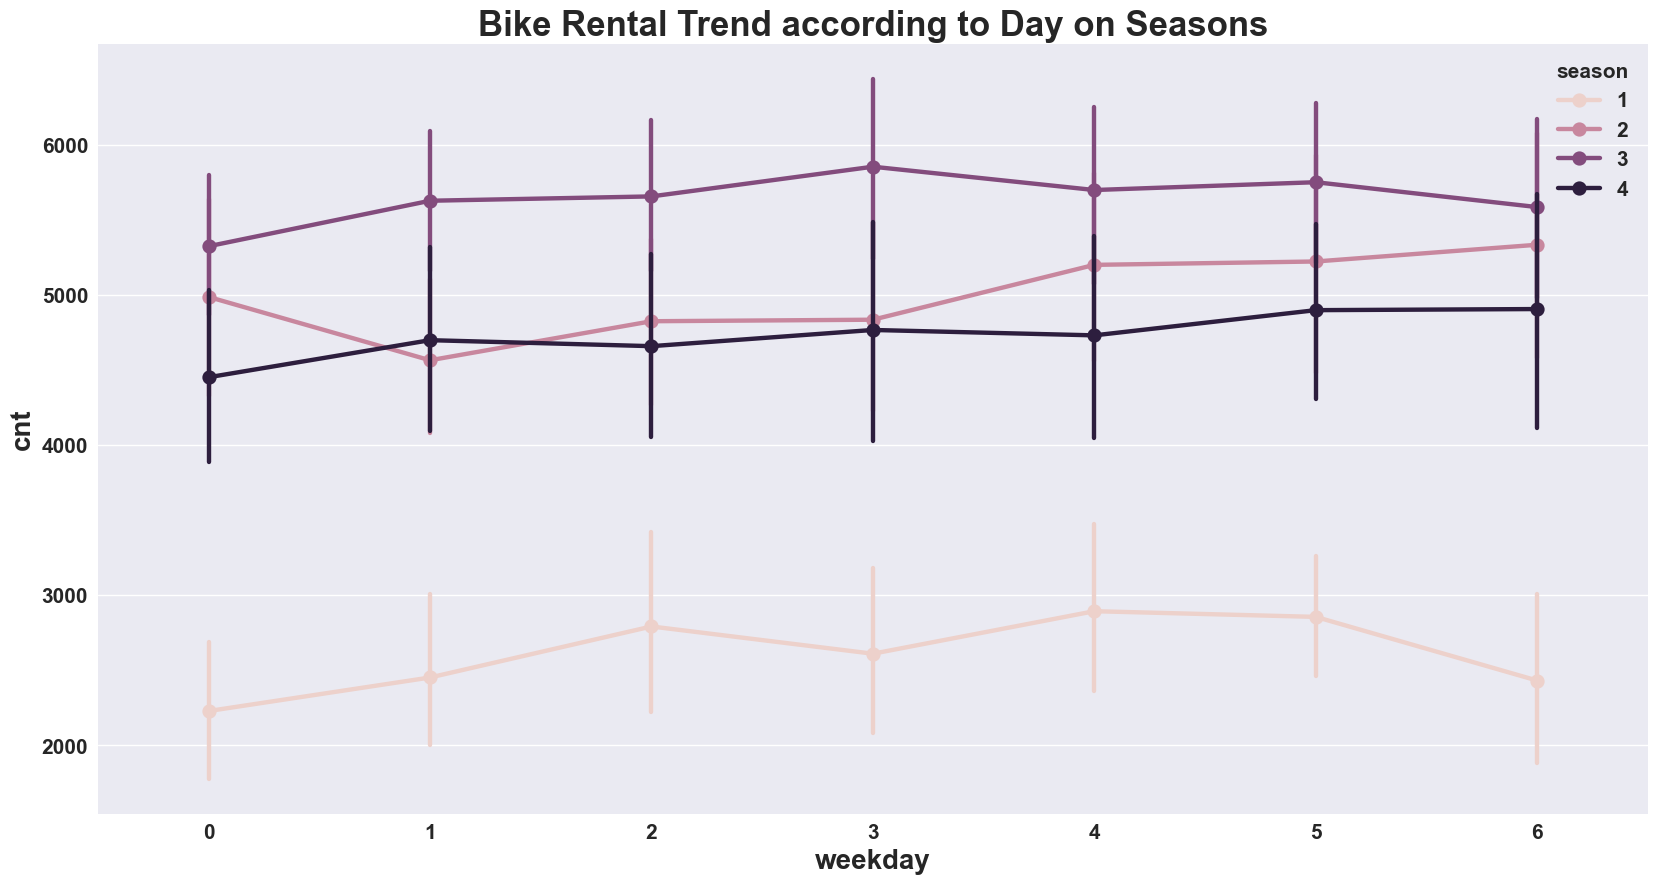

In [351]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to Day on Seasons")

### Observations:-
*  Season 3 (Fall season) shows the highest number of rentals throughout the week (purple line) , when weather is pleasant and ideal for biking.
*  Season 1 (Spring season) has the lowest rentals (light cream line), likely due to cold or harsh weather conditions reducing bike usage.
*  Seasons 2(Summer) and 4(Winter) show moderate and steady rental activity, with values between 4500–5200, indicating balanced riding conditions.
*  Across all seasons, the weekday pattern remains fairly consistent, suggesting that seasonal changes impact rentals more than weekday differences.
*  The variation between days is small, implying people ride bikes regularly across the week regardless of the specific weekday, but overall volume depends heavily on the season.

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Months')

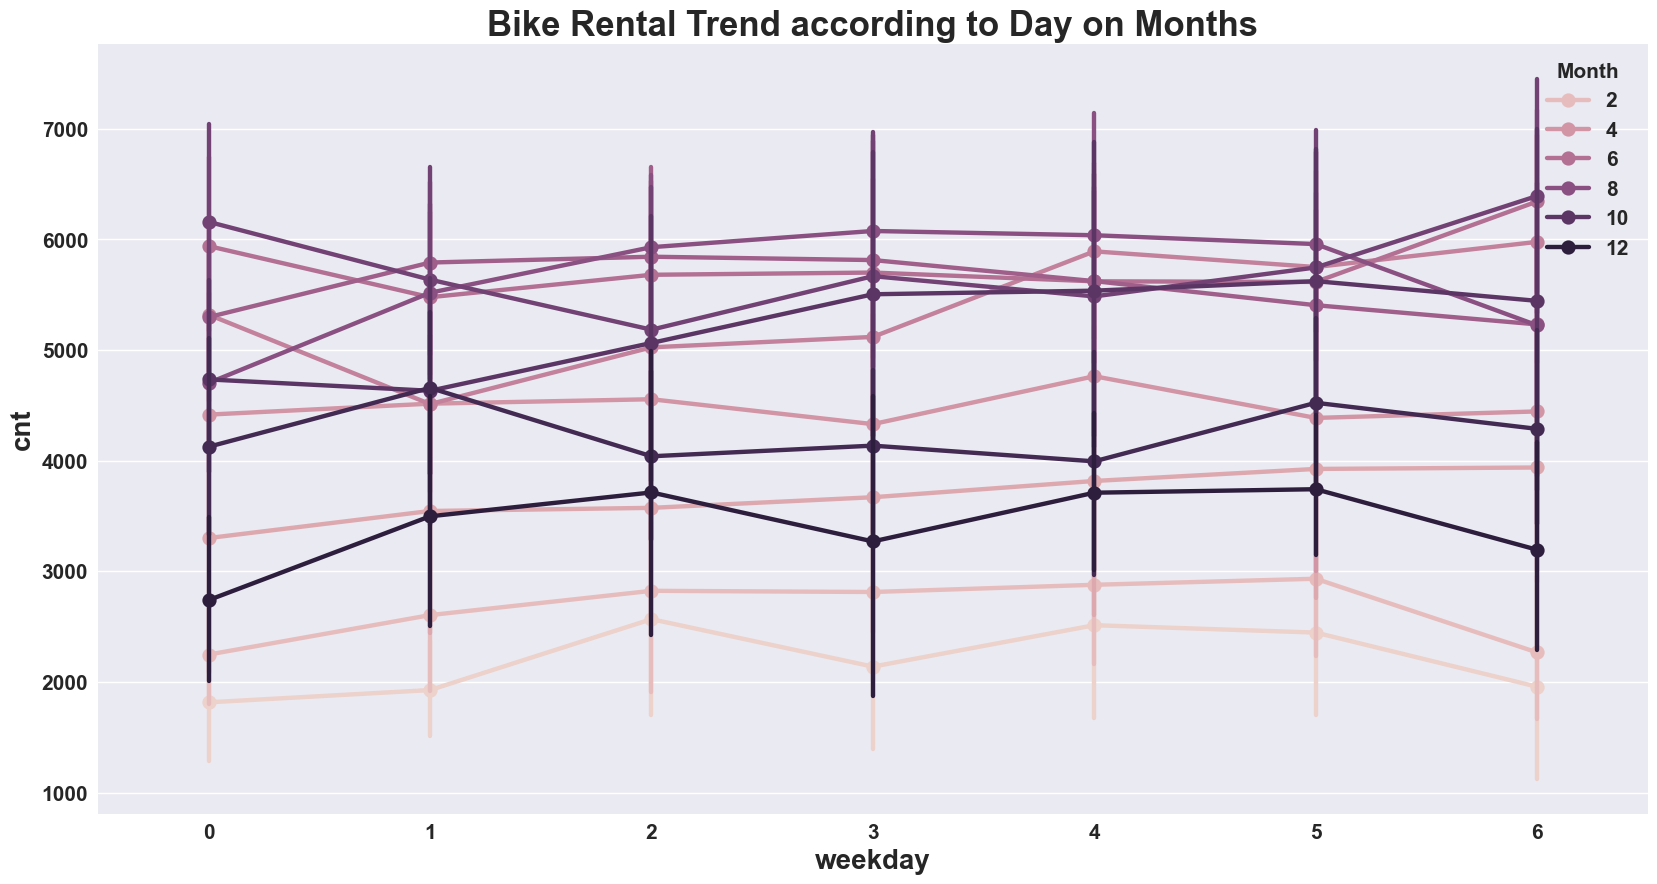

In [352]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['Month'])
plt.title("Bike Rental Trend according to Day on Months")

### Observations:-
*  June (month 6) and August (month 8) show the highest bike rental counts — around 6000+ rentals, indicating these are peak biking months, likely due to favorable weather.
*  February (month 2) records the lowest rentals (2000–3000 range), suggesting cold weather discourages biking.
*  April (month 4) shows a moderate rise, marking the transition from winter to warmer weather, with rentals steadily increasing.
*  October (month 10) and December (month 12) show mid-level to slightly lower rentals, possibly due to cooler or unpredictable weather conditions.
*  Across all months, the weekday pattern stays relatively stable, meaning people rent bikes consistently through the week — monthly weather variations have a stronger effect than the day of the week.
*  The highest overall activity is seen during summer months (6–8), while winter months (2, 12) show a clear decline in ridership.

## Distribution of Target Variable

<Axes: xlabel='cnt'>

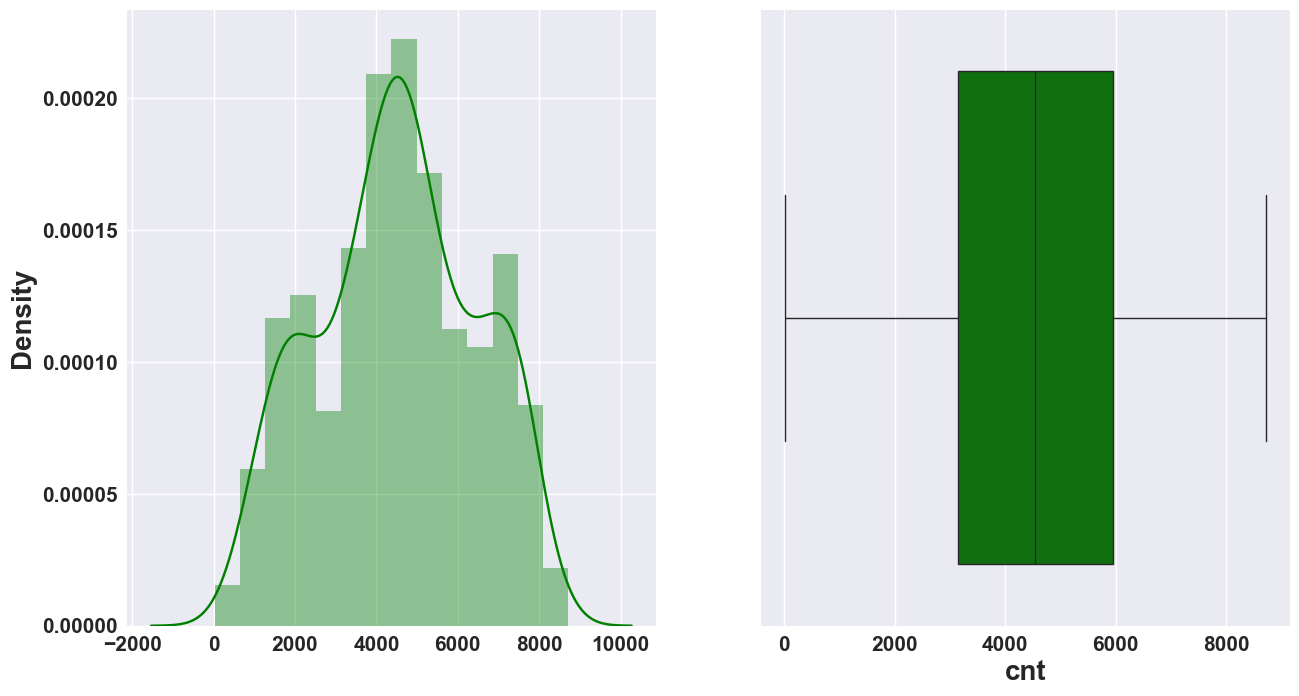

In [353]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['cnt'],color='g',ax=axes[0])
sns.boxplot(x = dataset['cnt'],color='g',ax=axes[1])

* The target variable (cnt) shows an approximately normal distribution, slightly positively skewed — meaning most rental counts are concentrated around the middle range.
* From the box plot, the median is near the center of the box, confirming a fairly symmetric distribution .
* No significant outliers are visible in the box plot — most observations fall within a normal range.

<Axes: xlabel='cnt'>

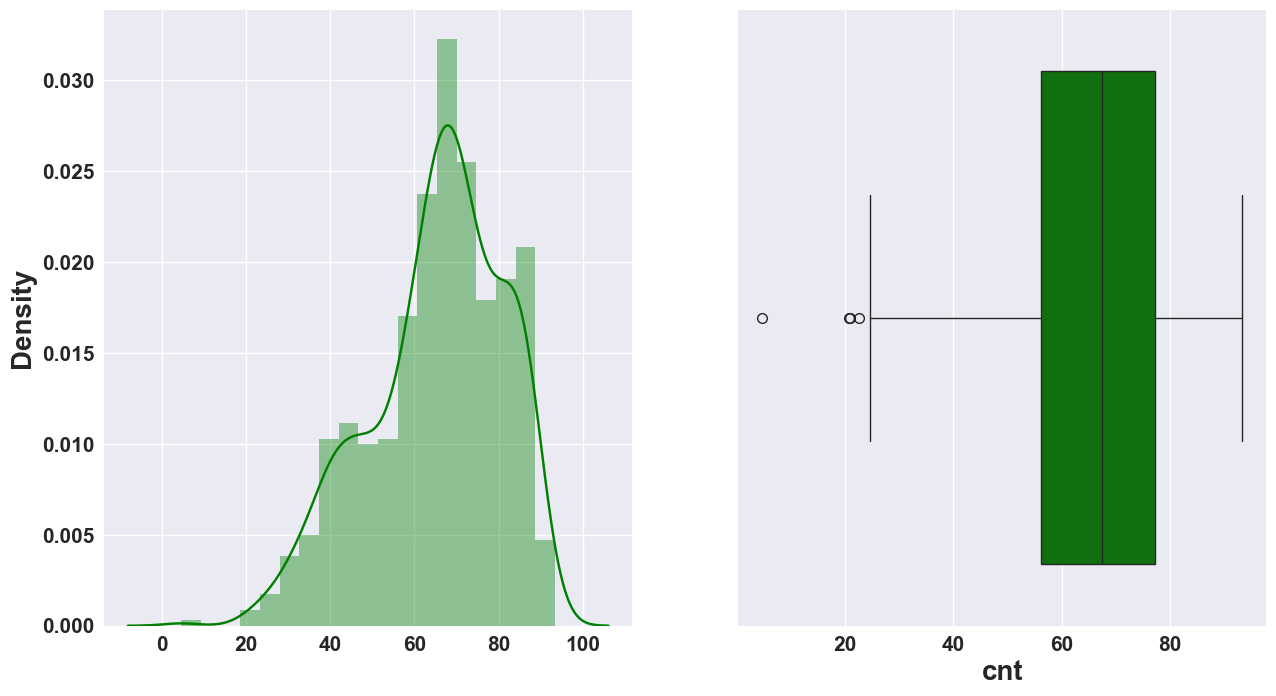

In [354]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(dataset['cnt']),color='g',ax=axes[0])
sns.boxplot(x = np.sqrt(dataset['cnt']),color='g',ax=axes[1])

* The target variable (cnt) has been normalized using the square root transformation, which made the distribution more symmetric.
* From the box plot, we can observe a few minor outliers on the lower end, but the majority of data points fall within a normal range.
* Overall, the normalization process improved the data’s shape, making it more suitable for regression or statistical modeling.

### Univariate Analysis

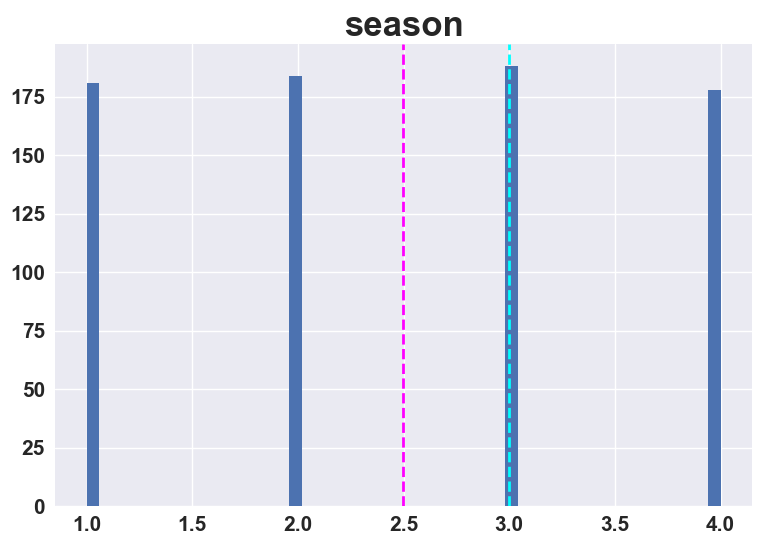

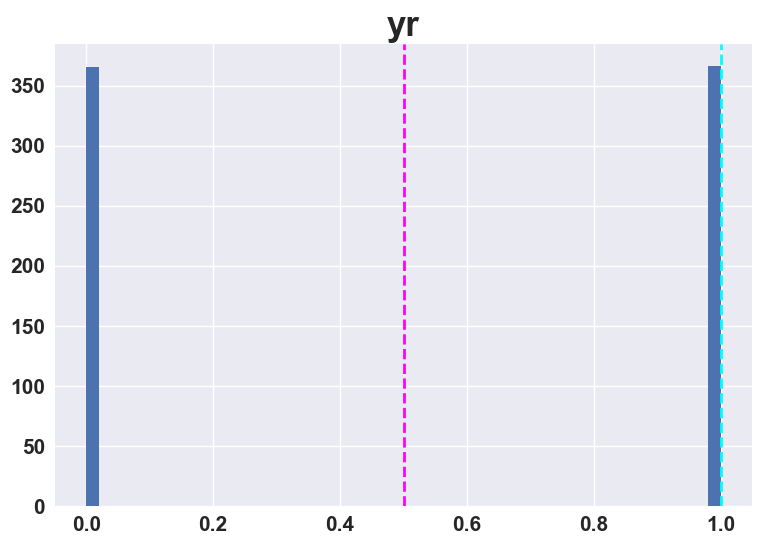

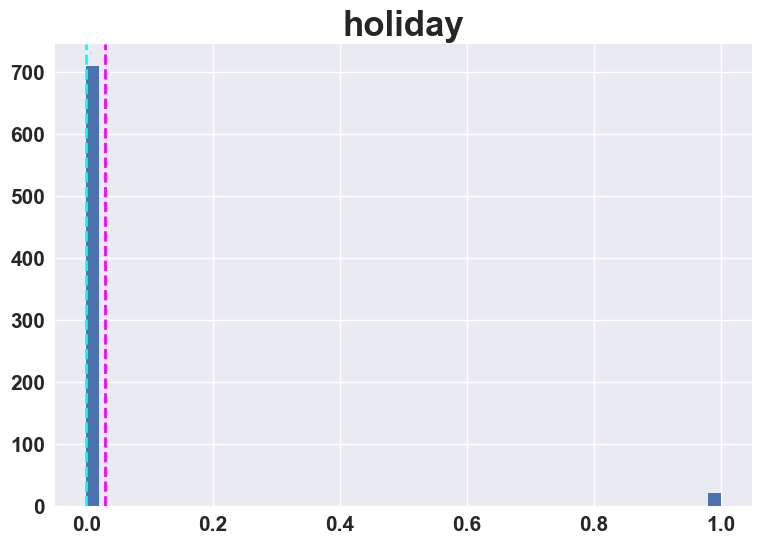

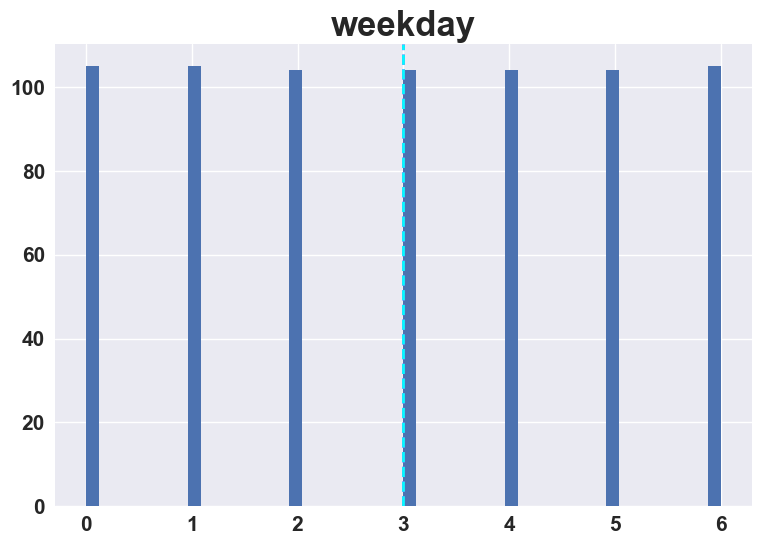

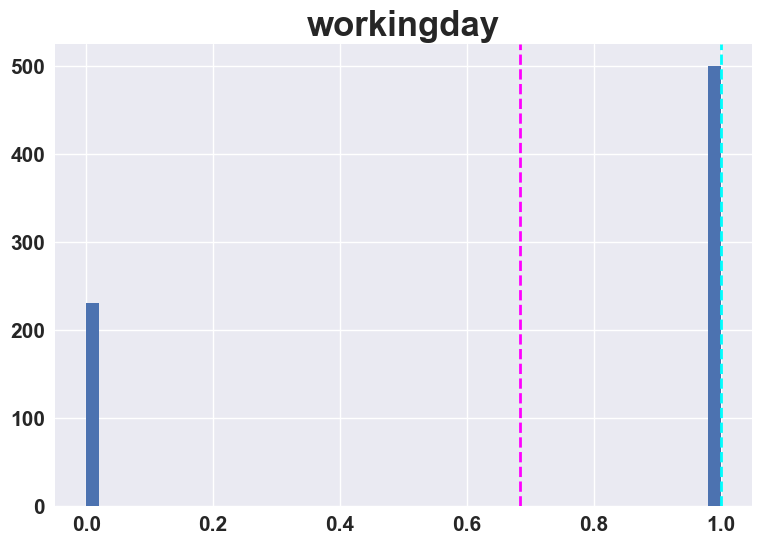

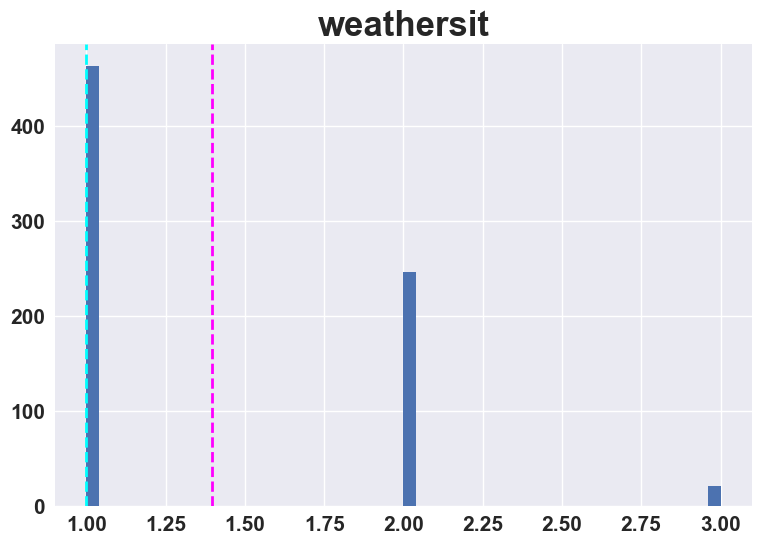

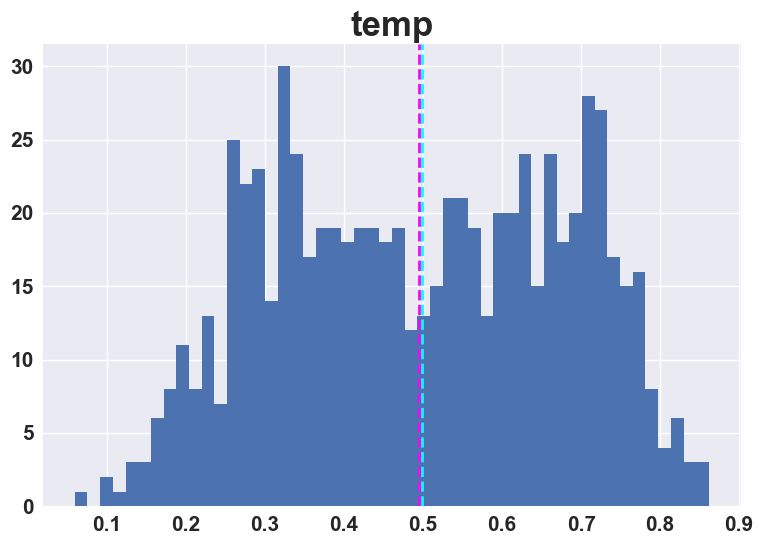

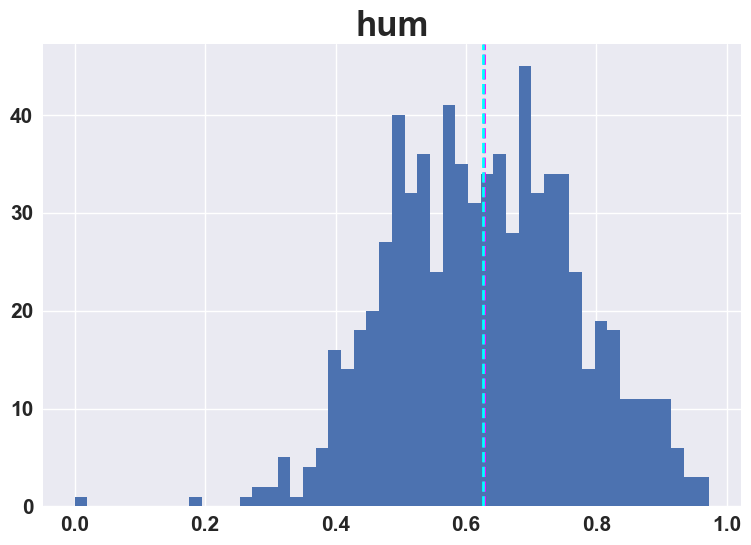

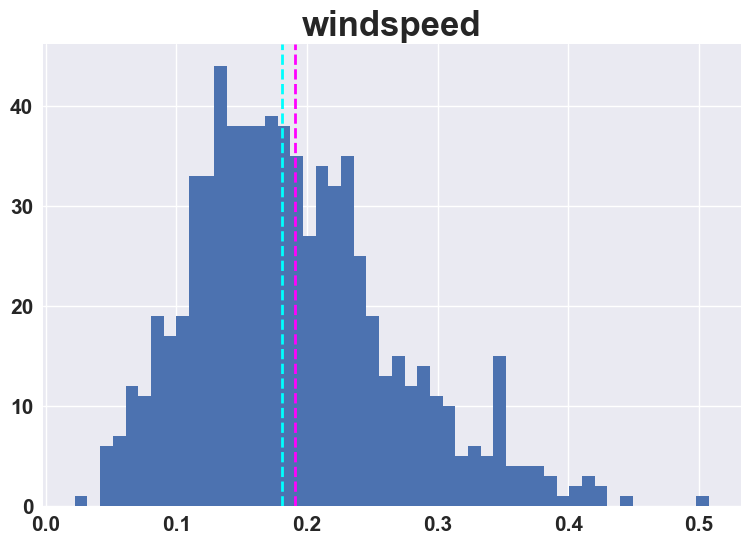

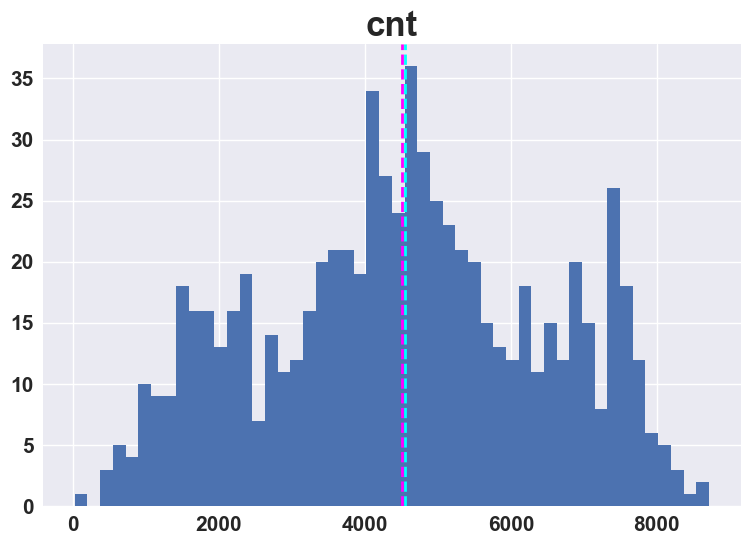

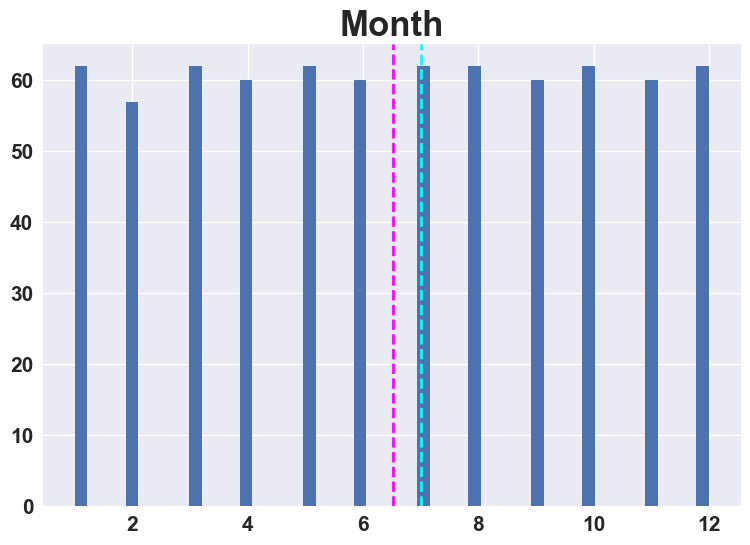

In [355]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

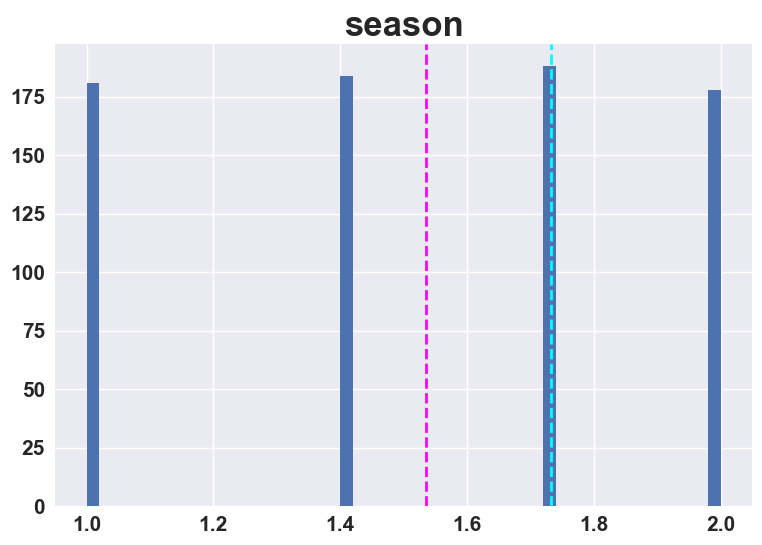

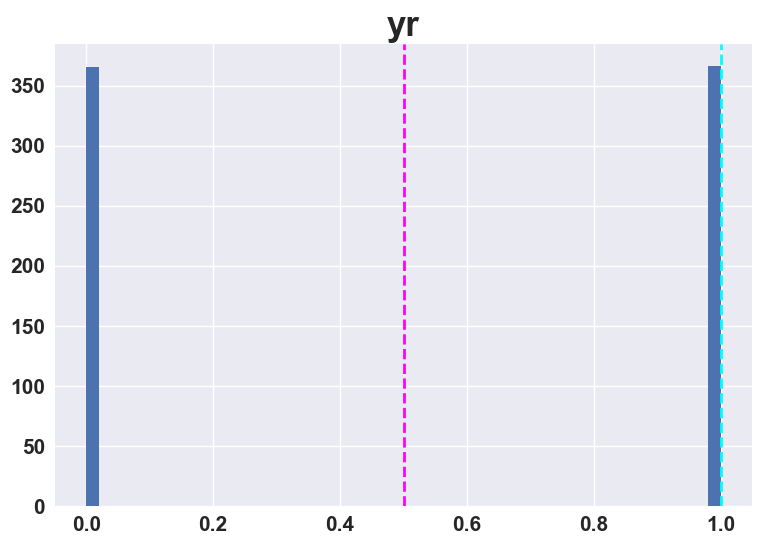

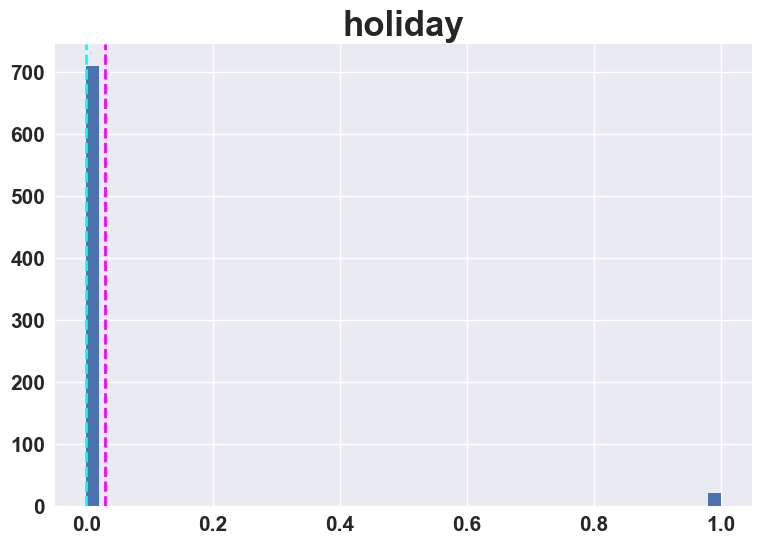

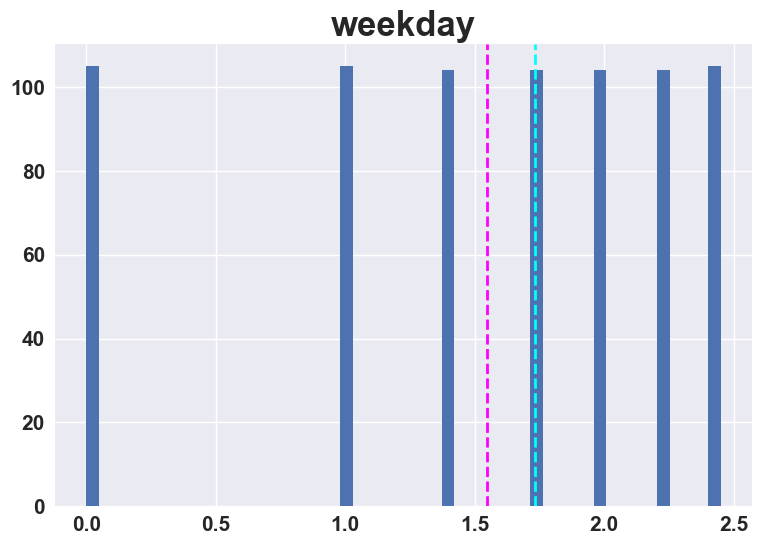

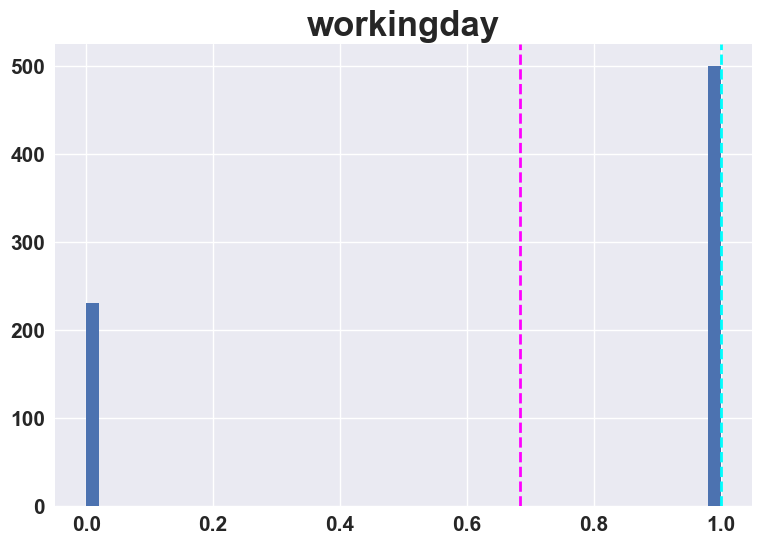

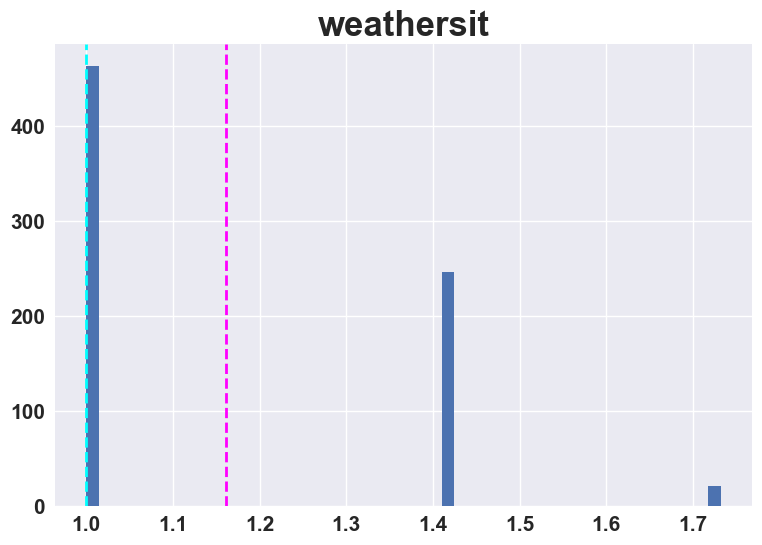

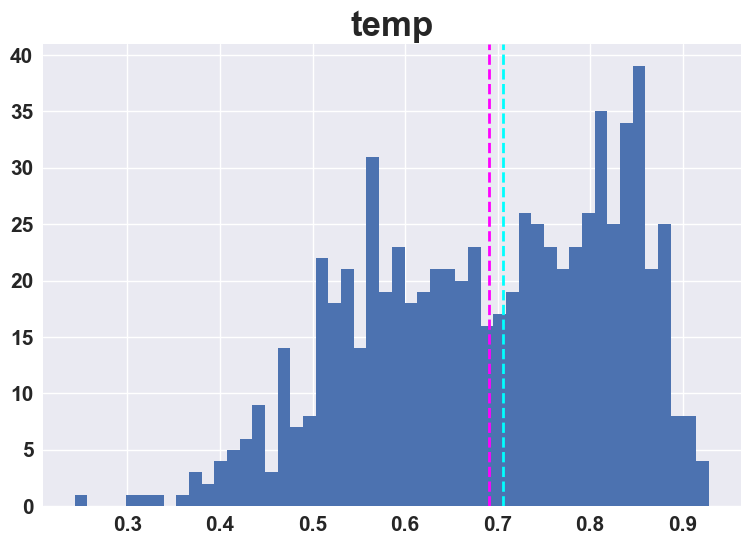

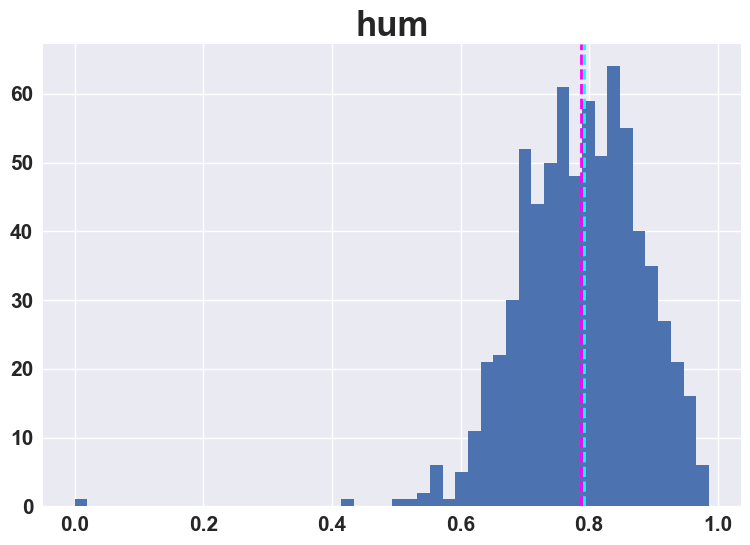

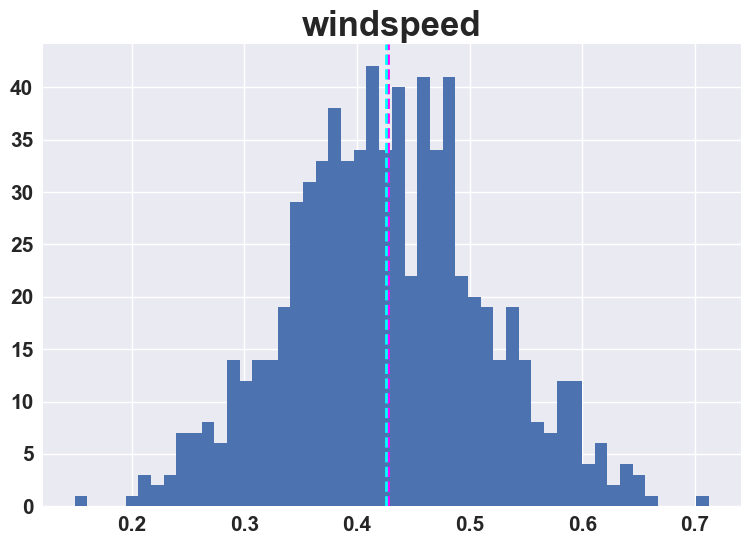

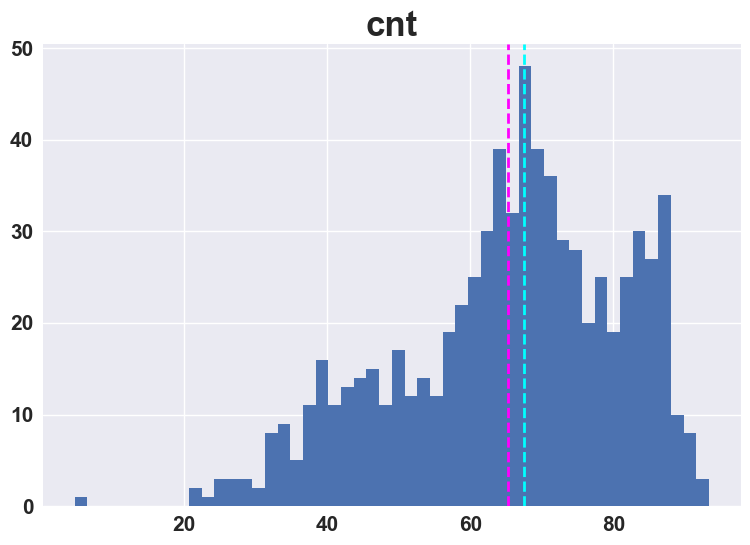

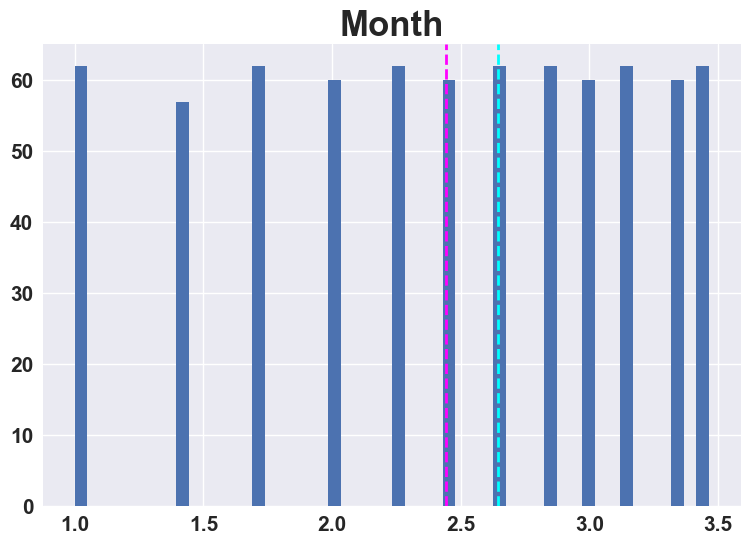

In [356]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Bivariate Analysis

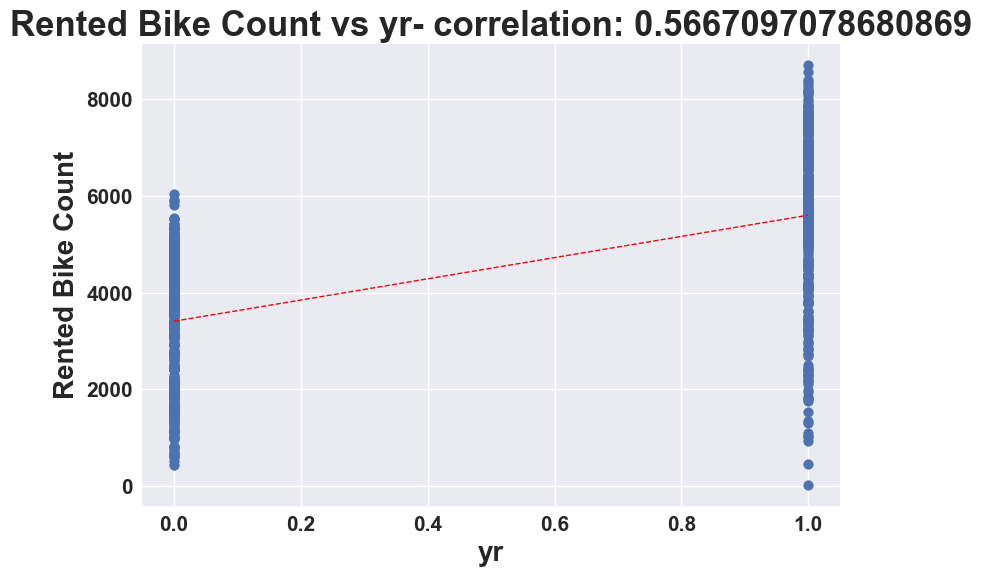

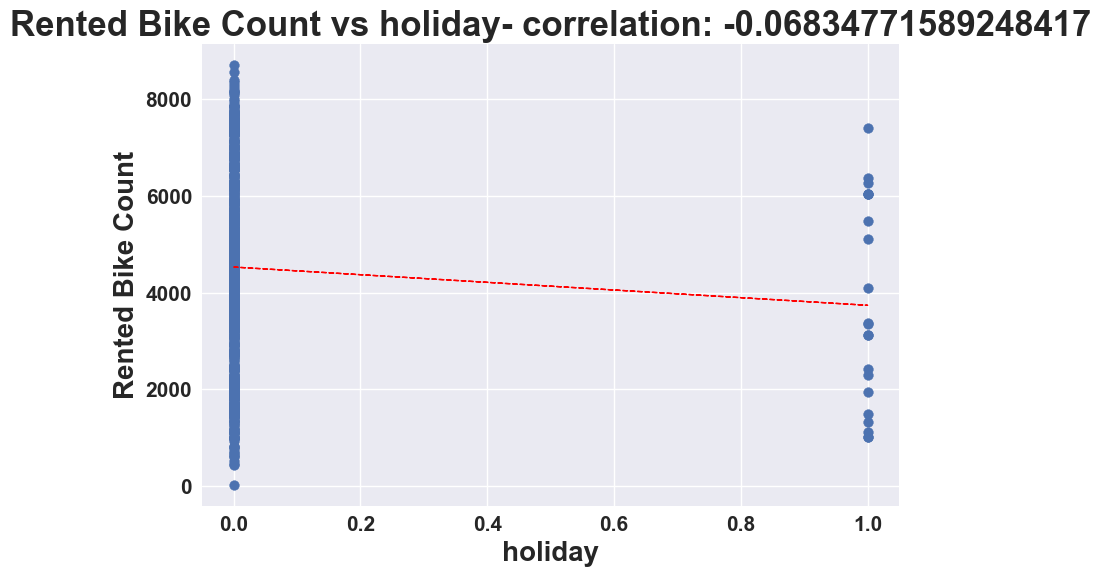

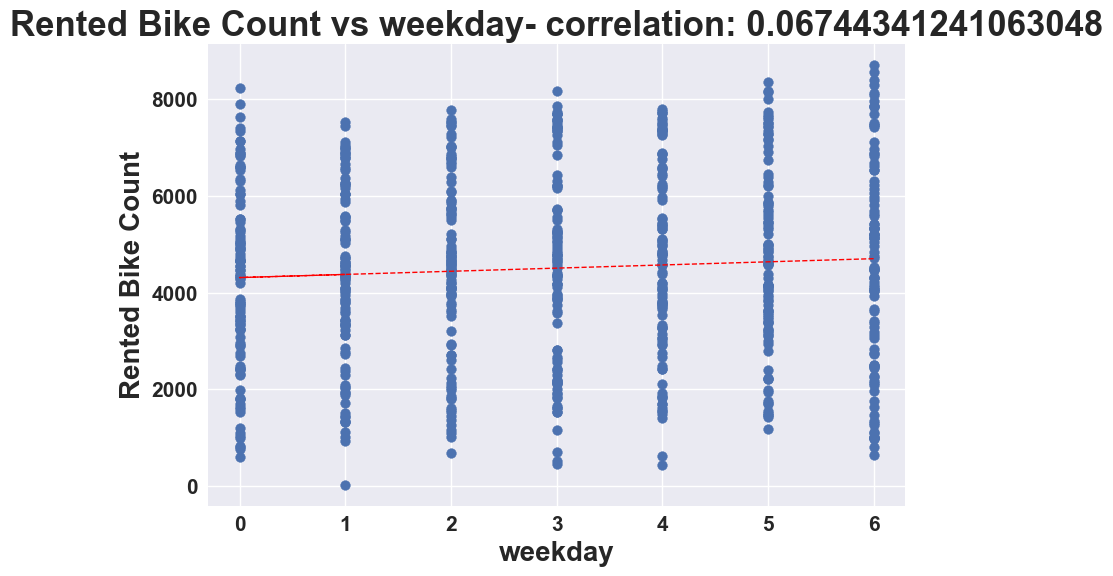

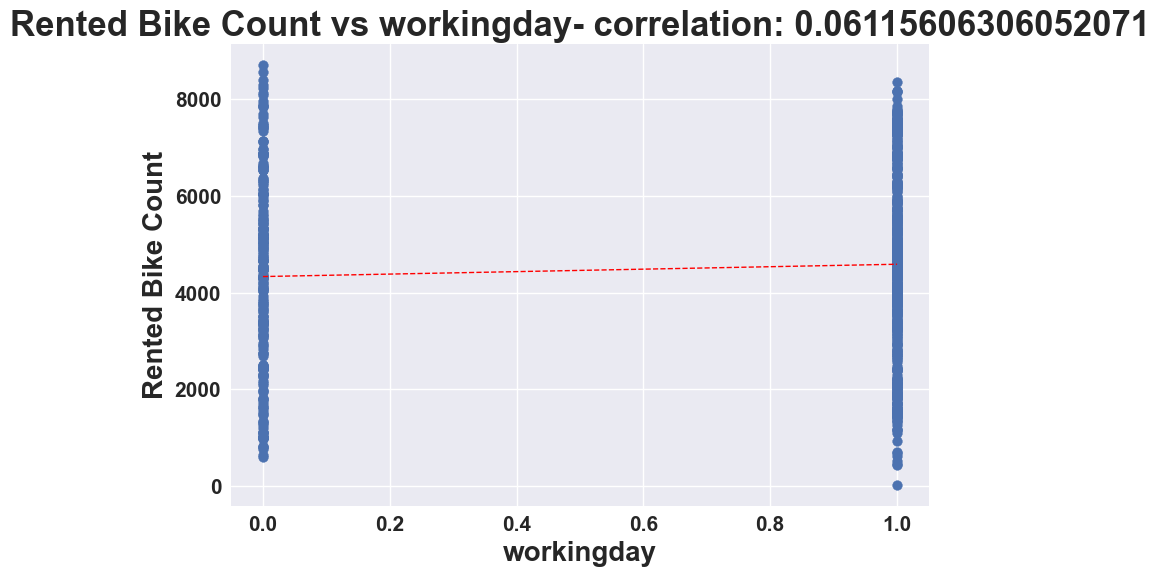

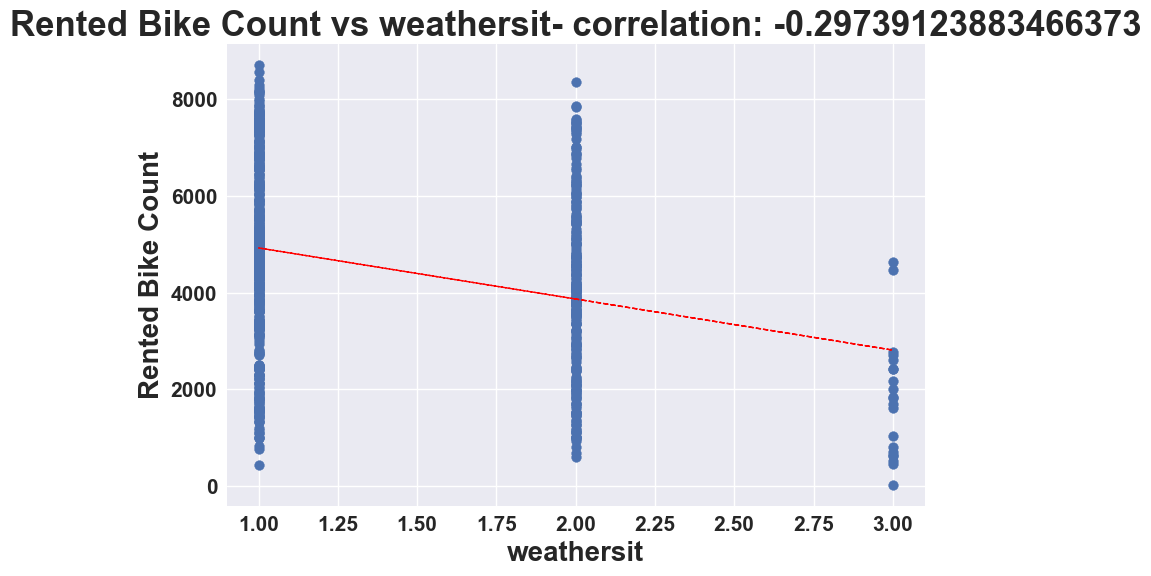

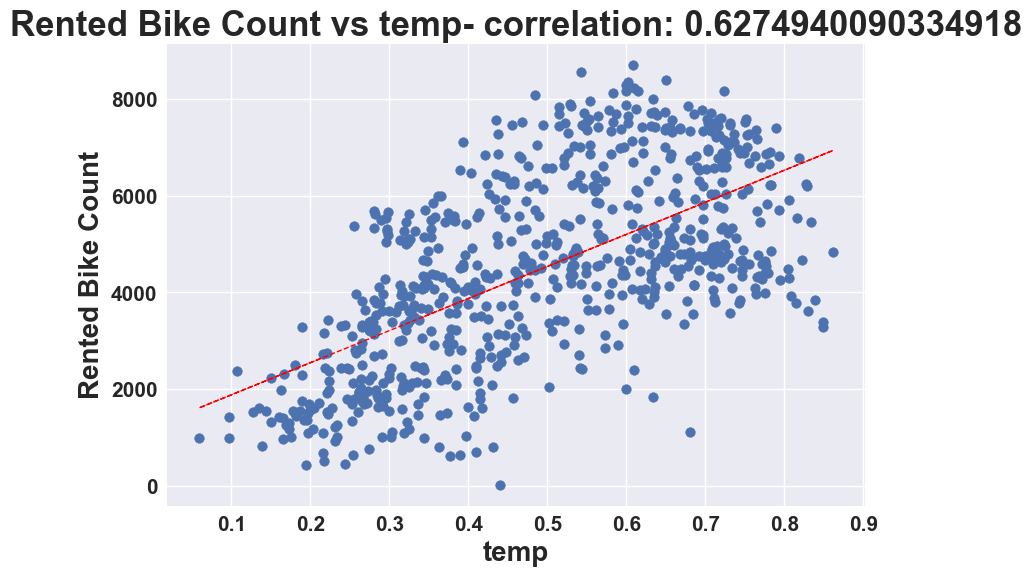

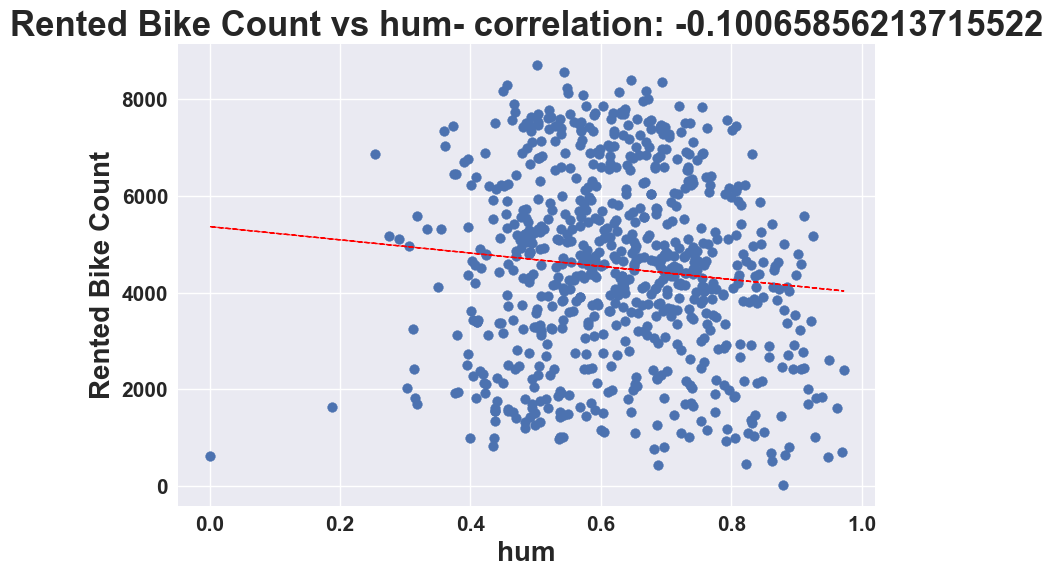

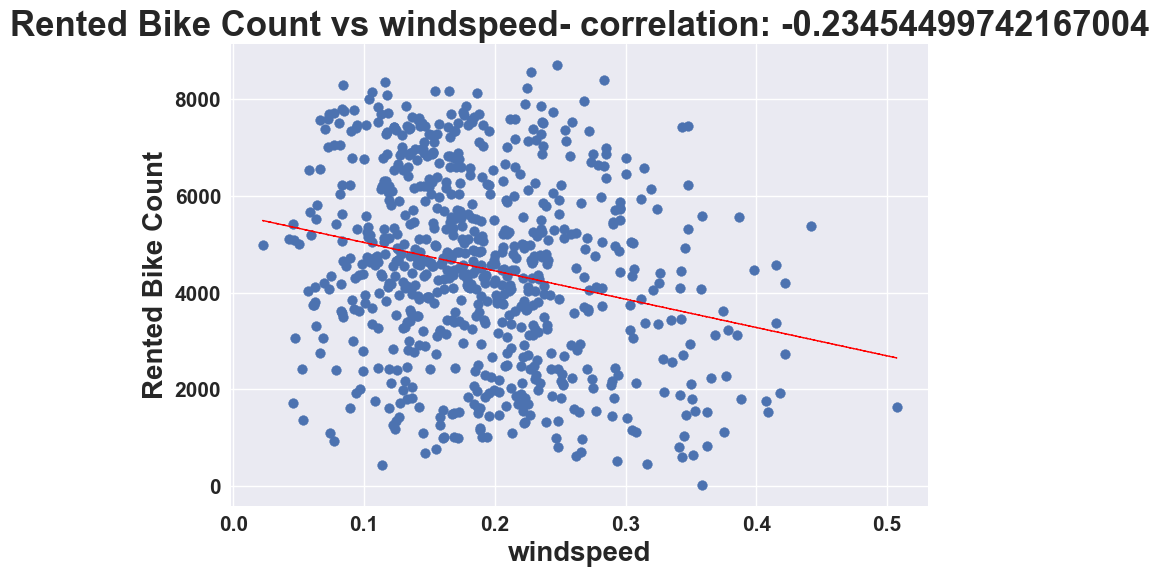

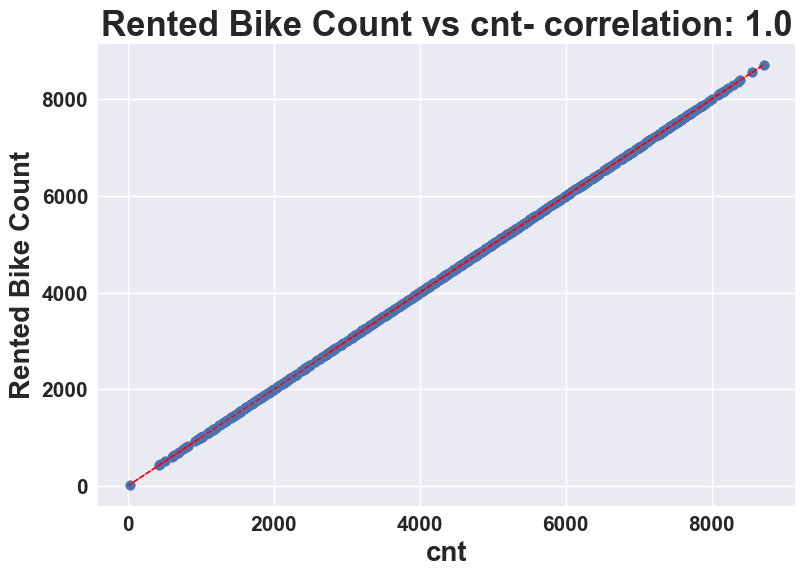

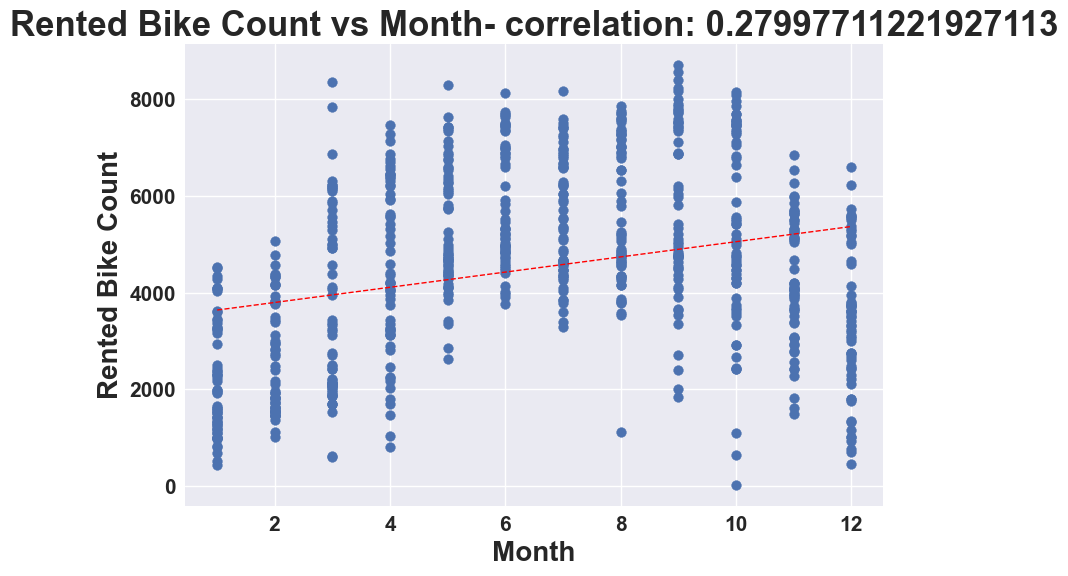

In [357]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['cnt'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()


### Observations:-

## Year(yr):-
1) There is a moderate positive correlation (0.56) between year and bike rental count, meaning rentals have increased in the second year compared to the first.
2) This suggests the bike-sharing system has grown in popularity over time.

## Holiday :-
1) The correlation (-0.06) is slightly negative, indicating fewer rentals on holidays.
2) This could be because people travel less for work or college on holidays.

## Weekday :-
1) The correlation (0.06) is very low, showing weekday doesn’t strongly influence rentals.
2) Rentals remain relatively consistent throughout the week, indicating regular usage patterns.

## Working Day :-
1) The correlation (0.06) is weakly positive, meaning there’s a slight increase in rentals on working days.
2) This is expected as commuters likely use bikes for daily travel.

## Weather Situation (weathersit):-
1) The correlation (-0.29) shows a moderate negative relationship.
2) Poor weather (rainy or cloudy) leads to a significant drop in bike rentals.
3) Most rentals occur during clear weather conditions.

## Temperature (temp):-
1) There is a strong positive correlation (0.62) — as temperature increases, bike rentals also increase.
2) This means people prefer biking in warmer, comfortable weather.

## Wind Speed (windspeed):-
1) The correlation (-0.23) indicates a negative relationship.
2) Higher wind speeds discourage biking, while moderate wind conditions favor rentals.

## Count (cnt):-
1) The correlation is perfect (1.0) because it is the target variable itself.
2) This serves as a reference for validating other correlations.

## Month:-
1) The correlation (0.28) shows a slight positive trend, meaning rentals gradually increase in later months.
2) Warmer months (summer and early autumn) typically have higher bike rental counts compared to colder months.

<Axes: >

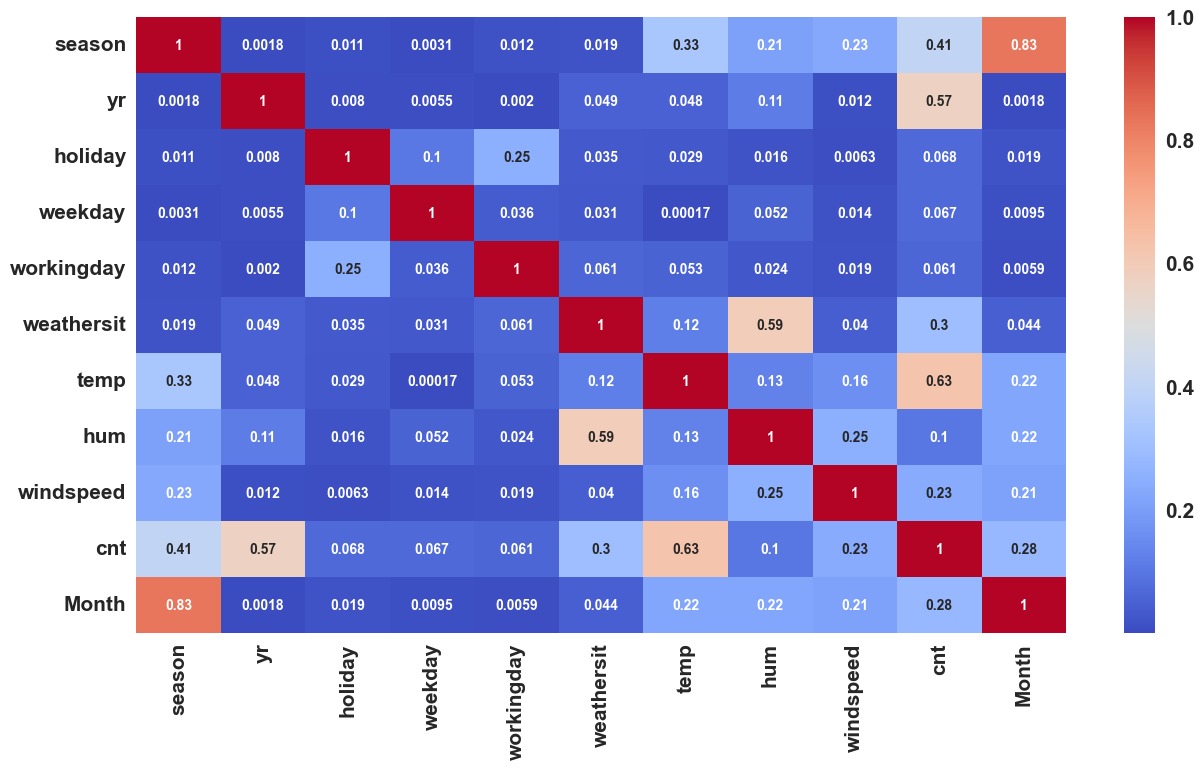

In [358]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [359]:
df = dataset.copy()

### Modeling

In [360]:
df.head(1)

season  yr  holiday  weekday  workingday  weathersit      temp       hum  \
0       1   0        0        6           0           2  0.344167  0.805833   

   windspeed  cnt  Month  
0   0.160446  985      1

In [361]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [362]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

variables        VIF
0      season  21.112433
1          yr   1.946383
2     holiday   1.099314
3     weekday   3.099564
4  workingday   3.267082
5  weathersit  13.070004
6        temp   9.498830
7         hum  25.607610
8   windspeed   5.296247
9       Month  15.229246

In [363]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [364]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [388]:
df['holiday'] = df['holiday'].map({'No holiday':0, 'holiday':1})

In [366]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [389]:
df['workingday'] = df['workingday'].map({'Yes':1, 'No':0})

In [406]:
df.loc[df['holiday'].isna(), 'holiday'] = 0  
df.loc[df['workingday'].isna(), 'workingday'] = 1  


In [407]:
df.head()

season  yr  holiday  weekday  workingday  weathersit      temp       hum  \
0       1   0      0.0        6         1.0           2  0.344167  0.805833   
1       1   0      0.0        0         1.0           2  0.363478  0.696087   
2       1   0      0.0        1         1.0           1  0.196364  0.437273   
3       1   0      0.0        2         1.0           1  0.200000  0.590435   
4       1   0      0.0        3         1.0           1  0.226957  0.436957   

   windspeed   cnt  Month  
0   0.160446   985      1  
1   0.248539   801      1  
2   0.248309  1349      1  
3   0.160296  1562      1  
4   0.186900  1600      1

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   holiday     731 non-null    float64
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    float64
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   cnt         731 non-null    int64  
 10  Month       731 non-null    int32  
dtypes: float64(5), int32(1), int64(5)
memory usage: 60.1 KB


### Linear Regression

In [410]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [411]:

dependent_variable = 'cnt'

In [412]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['season',
 'weathersit',
 'holiday',
 'weekday',
 'workingday',
 'hum',
 'Month',
 'yr',
 'windspeed',
 'temp']

In [413]:
y = np.sqrt(df['cnt'])
X = df.drop('cnt',axis=1)

In [414]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [415]:
X_train[0:10]

season  yr  holiday  weekday  workingday  weathersit      temp       hum  \
97        2   0      0.0        5         1.0           2  0.335833  0.836250   
503       2   1      0.0        5         1.0           1  0.564167  0.523333   
642       4   1      0.0        4         1.0           2  0.657500  0.722917   
498       2   1      0.0        0         1.0           1  0.612500  0.576250   
303       4   0      0.0        1         1.0           1  0.340000  0.703333   
570       3   1      0.0        2         1.0           1  0.750833  0.655000   
250       3   0      0.0        4         1.0           3  0.633913  0.939565   
17        1   0      0.0        2         1.0           2  0.216667  0.861667   
595       3   1      0.0        6         1.0           1  0.678333  0.603333   
240       3   0      0.0        1         1.0           1  0.636667  0.554583   

     windspeed  Month  
97    0.226992      4  
503   0.136817      5  
642   0.117546     10  
498   0.225117      5  
303   0.106350     10  
570   0.211454      7  
250   0.192748      9  
17    0.146775      1  
595   0.177867      8  
240   0.159825      8

In [416]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [417]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 10)
(584,)
(147, 10)
(147,)


In [418]:
X_train[0:10]

array([[0.33333333, 0.        , 0.        , 0.83333333, 0.        ,
        0.5       , 0.35024023, 0.80442593, 0.48605788, 0.27272727],
       [0.33333333, 1.        , 0.        , 0.83333333, 0.        ,
        0.        , 0.63925722, 0.35526299, 0.24873701, 0.36363636],
       [1.        , 1.        , 0.        , 0.66666667, 0.        ,
        0.5       , 0.75739478, 0.64174706, 0.19801995, 0.81818182],
       [0.33333333, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.7004354 , 0.43122037, 0.48112329, 0.36363636],
       [1.        , 0.        , 0.        , 0.16666667, 0.        ,
        0.        , 0.35551467, 0.61363607, 0.16855453, 0.81818182],
       [0.66666667, 1.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.87553235, 0.54425859, 0.44516526, 0.54545455],
       [0.66666667, 0.        , 0.        , 0.66666667, 0.        ,
        1.        , 0.72753921, 0.9527249 , 0.39593516, 0.72727273],
       [0.        , 0.        , 0.       

In [419]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [421]:
regressor.coef_

array([ 1.22023790e+01,  1.47980932e+01, -1.06581410e-14,  3.11008784e+00,
        1.42108547e-14, -8.84562395e+00,  3.44297500e+01, -7.85111359e+00,
       -9.69292054e+00, -2.96218161e+00])

In [422]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

Coefficient
season      1.220238e+01
yr          1.479809e+01
holiday    -1.065814e-14
weekday     3.110088e+00
workingday  1.421085e-14
weathersit -8.845624e+00
temp        3.442975e+01
hum        -7.851114e+00
windspeed  -9.692921e+00
Month      -2.962182e+00

In [423]:
regressor.intercept_

np.float64(42.23278110229103)

In [424]:
regressor.score(X_train,y_train)

0.7770394354472703

In [425]:
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 5.832888873998277.
The Mean Squred Error(MSE) is 57.07944858239566.
The Root Mean Squared Error(RMSE) is 7.555094213998636.
The R2 Score is 0.7990557087384645.
Adjusted R2 is 0.7842803932045281.


In [427]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [428]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted_R2
0  Linear Regression  5.8329  57.0794  7.5551    0.7991       0.7843

In [429]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [430]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [431]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

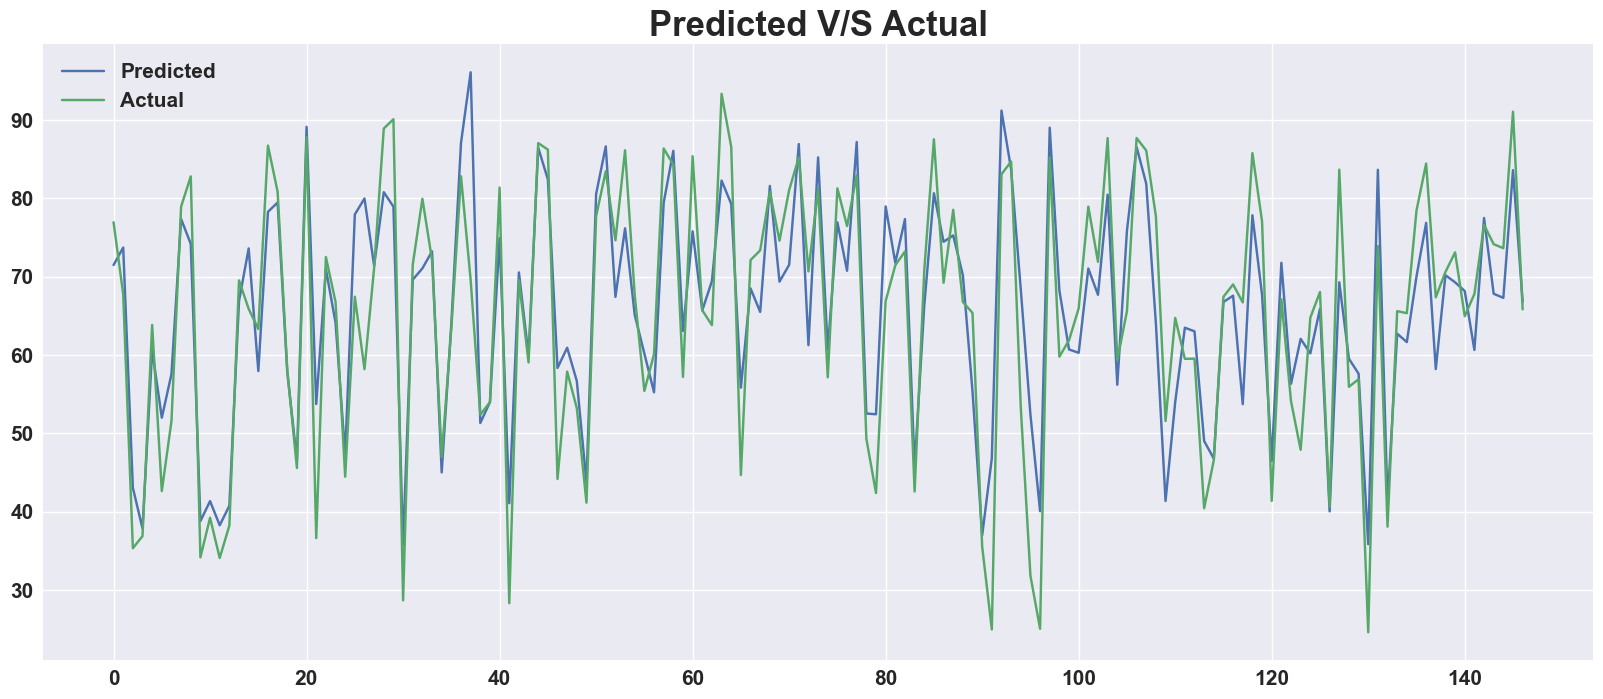

In [432]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

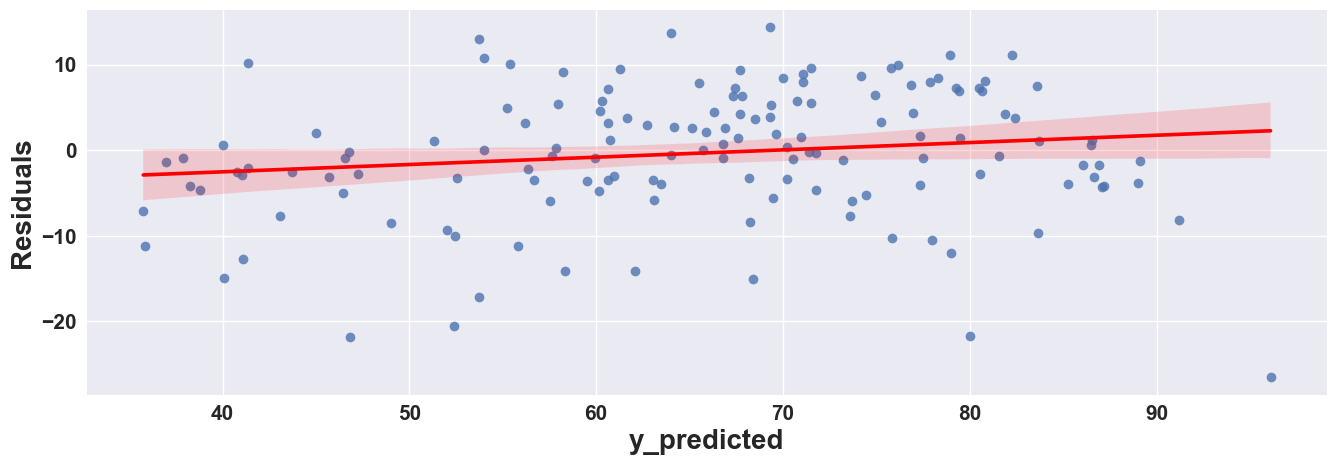

In [433]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

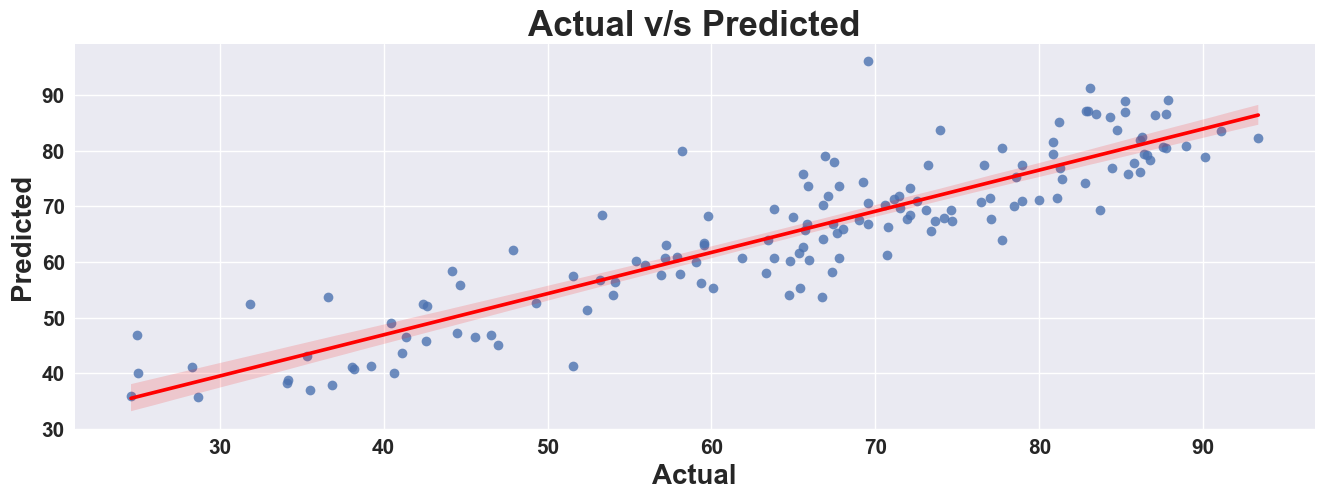

In [434]:
plot_scatter(y_pred,y_test)

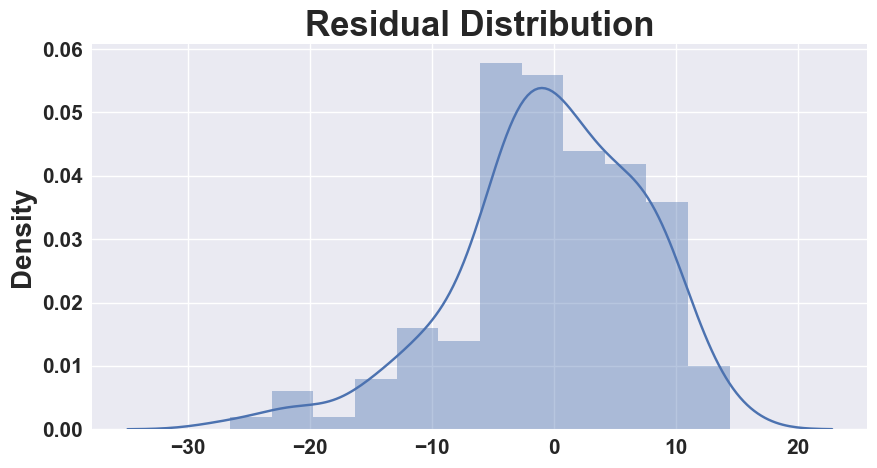

In [435]:
Residual_distPlot(y_pred,y_test)

### Lasso

In [436]:
lasso_reg = Lasso(alpha = 0.01)

In [438]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [439]:
lasso_reg.coef_

array([11.73802681, 14.78094201,  0.        ,  3.00995852,  0.        ,
       -8.91553166, 34.3077732 , -7.46980543, -9.36667417, -2.38577918])

In [440]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

Coeficients
season        11.738027
yr            14.780942
holiday        0.000000
weekday        3.009959
workingday     0.000000
weathersit    -8.915532
temp          34.307773
hum           -7.469805
windspeed     -9.366674
Month         -2.385779

In [441]:
lasso_reg.intercept_

np.float64(41.998128733659556)

In [442]:
lasso_reg.score(X_train,y_train)

0.7769598070659814

In [443]:
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

In [ ]:
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 5.834056150014458.
 The Mean Squred Error(MSE) is 57.19061534442137.
The Root Mean Squared Error(RMSE) is 7.562447708541288.
The R2 Score is 0.7986643537628668.
Adjusted R2 is 0.7838602621277835.


In [446]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [451]:
import pandas as pd
test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted_R2
0  Linear Regression  5.8329  57.0794  7.5551    0.7991       0.7843
1              Lasso  5.8341  57.1906  7.5624    0.7987       0.7839

In [452]:
lasso_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [453]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -57.15874117091289


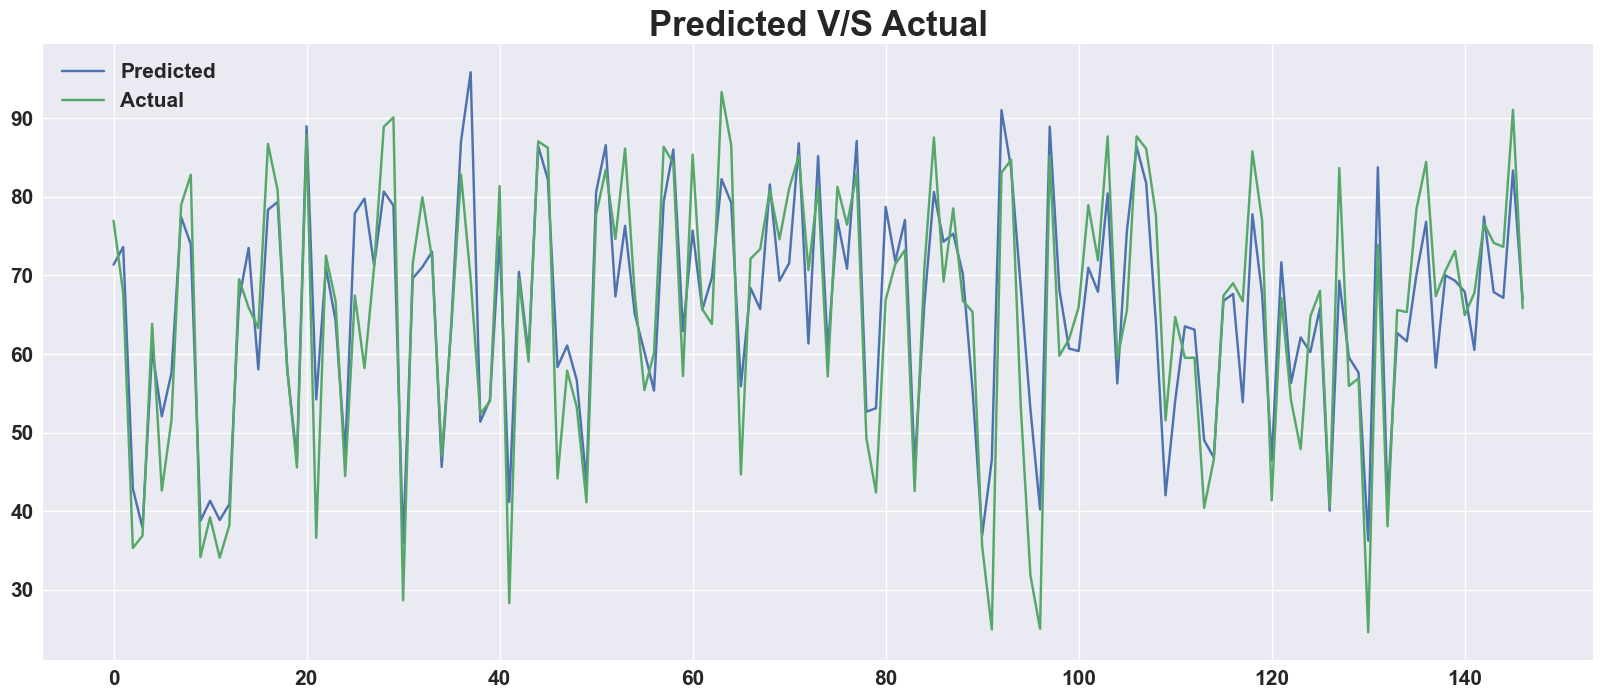

In [454]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

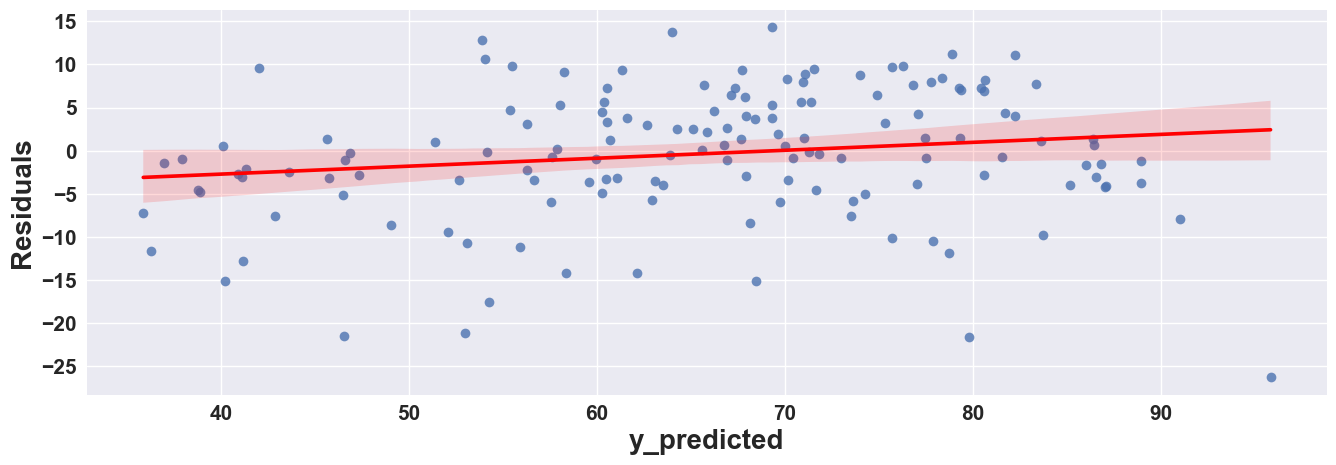

In [455]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

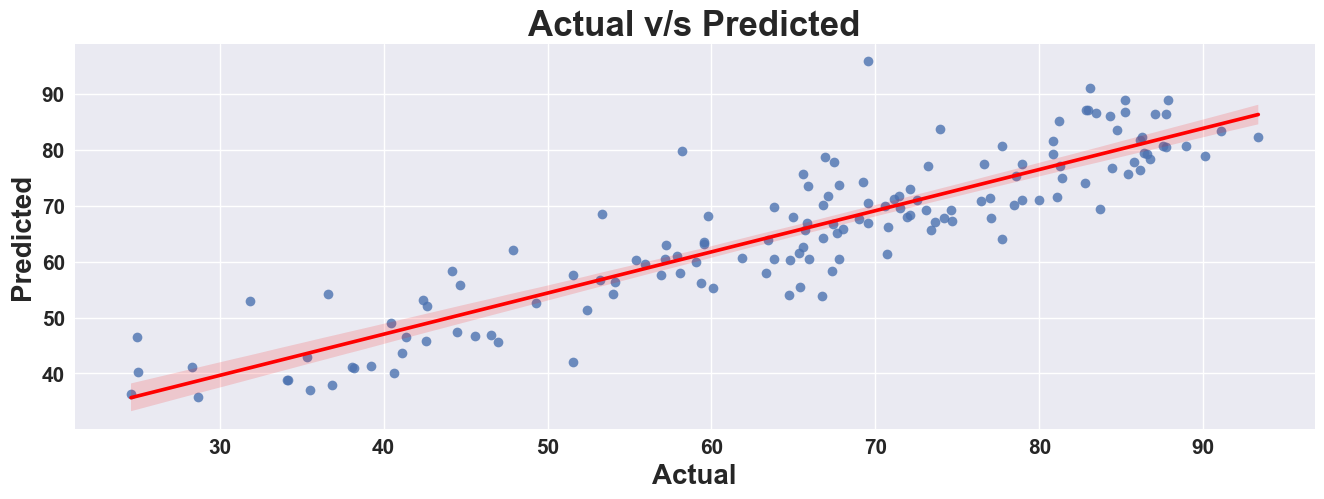

In [456]:
plot_scatter(y_pred,y_test)

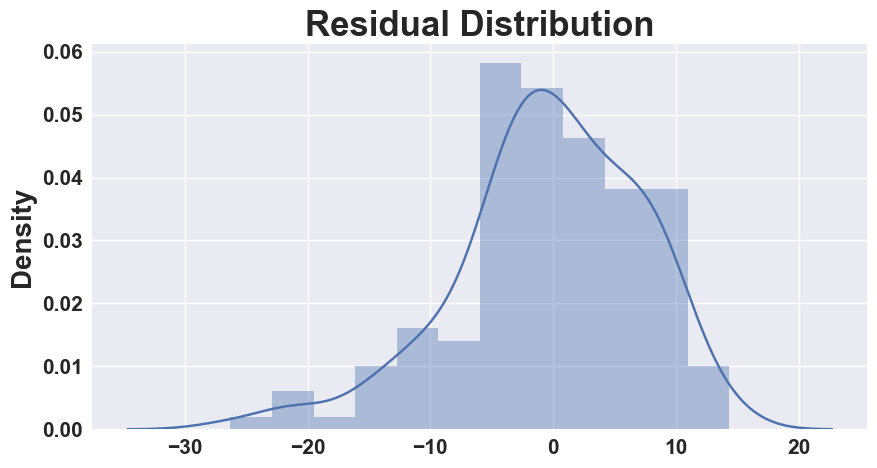

In [457]:
Residual_distPlot(y_pred,y_test)

### Ridge

In [458]:
ridge_reg = Ridge(alpha = 0.01)

In [459]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.01)

In [460]:
ridge_reg.coef_

array([12.19906784, 14.79778306,  0.        ,  3.10949234,  0.        ,
       -8.84857894, 34.41845634, -7.84295685, -9.68833794, -2.95708657])

In [461]:
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

Coeficients
season        12.199068
yr            14.797783
holiday        0.000000
weekday        3.109492
workingday     0.000000
weathersit    -8.848579
temp          34.418456
hum           -7.842957
windspeed     -9.688338
Month         -2.957087

In [462]:
ridge_reg.intercept_

np.float64(42.23323579445747)

In [463]:
ridge_reg.score(X_train,y_train)

0.7770393972498209

In [464]:
y_pred_train = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)


In [466]:
MAE = mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 5.832864699155246.
 The Mean Squred Error(MSE) is 57.07811832483429.
The Root Mean Squared Error(RMSE) is 7.555006176359772.
The R2 Score is 0.7990603918191442.
Adjusted R2 is 0.7842854206293755.


In [468]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [469]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  Adjusted_R2
0           Linear Regression  5.8329  57.0794  7.5551    0.7991       0.7843
1                       Lasso  5.8341  57.1906  7.5624    0.7987       0.7839
2  Ridge(GridsearchCv Tunned)  5.8329  57.0781  7.5550    0.7991       0.7843

In [471]:
ridge_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)

ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [472]:
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -57.15874117091289


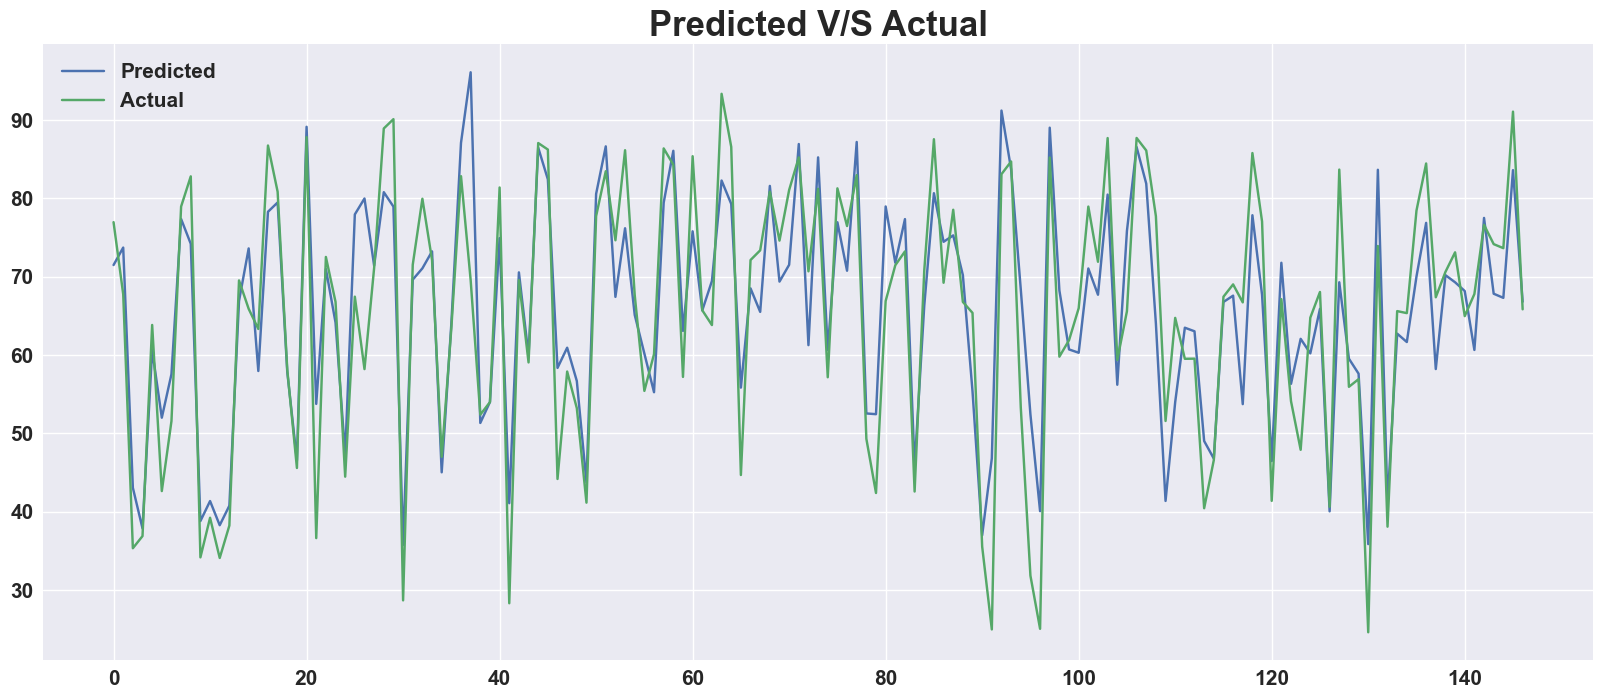

In [473]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

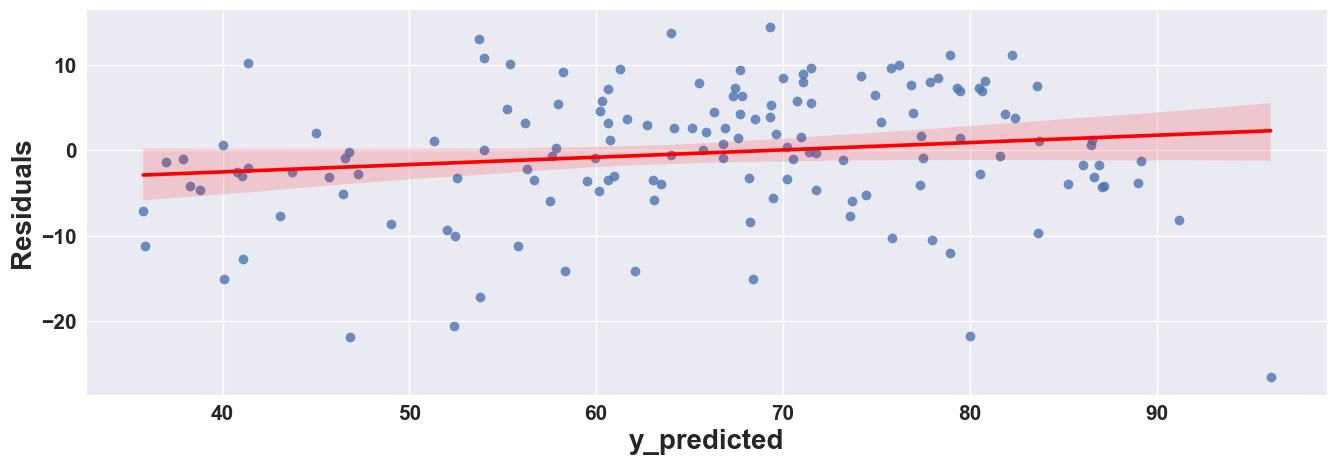

In [474]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

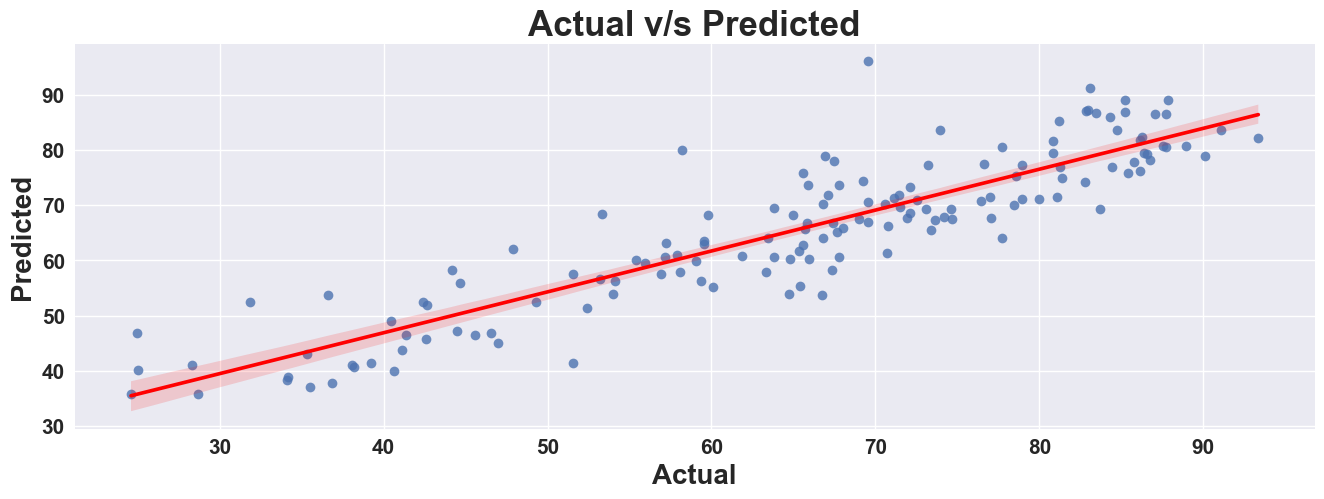

In [475]:
plot_scatter(y_pred,y_test)

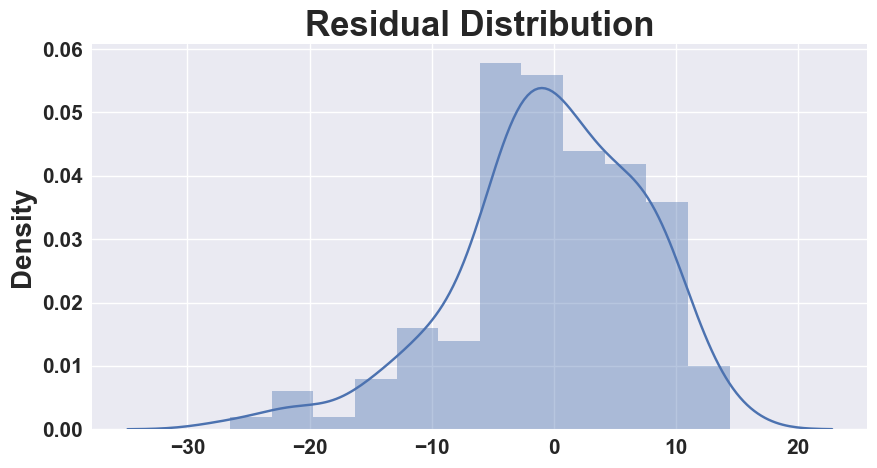

In [476]:
Residual_distPlot(y_pred,y_test)

### Elastic Net

In [477]:
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.3)

In [478]:
elastic_net_reg.score(X_test,y_test)

0.7990575814164425

In [479]:
y_pred_train = elastic_net_reg.predict(X_train)
y_pred = elastic_net_reg.predict(X_test)

In [ ]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.9787545183186742

In [480]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 5.832878963163022.
The Mean Squred Error(MSE) is 57.078916636821674.
The Root Mean Squared Error(RMSE) is 7.555059009486404.
The R2 Score is 0.7990575814164425.
Adjusted R2 is 0.7842824035794161.


In [481]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [482]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  \
0                Linear Regression  5.8329  57.0794  7.5551    0.7991   
1                            Lasso  5.8341  57.1906  7.5624    0.7987   
2       Ridge(GridsearchCv Tunned)  5.8329  57.0781  7.5550    0.7991   
3  ElasticNet(GridSearchCV-Tunned)  5.8329  57.0789  7.5551    0.7991   

   Adjusted_R2  
0       0.7843  
1       0.7839  
2       0.7843  
3       0.7843

In [483]:
elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [484]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.01, 'l1_ratio': 0.9}
The best negative mean squred error value is -57.12057363818983


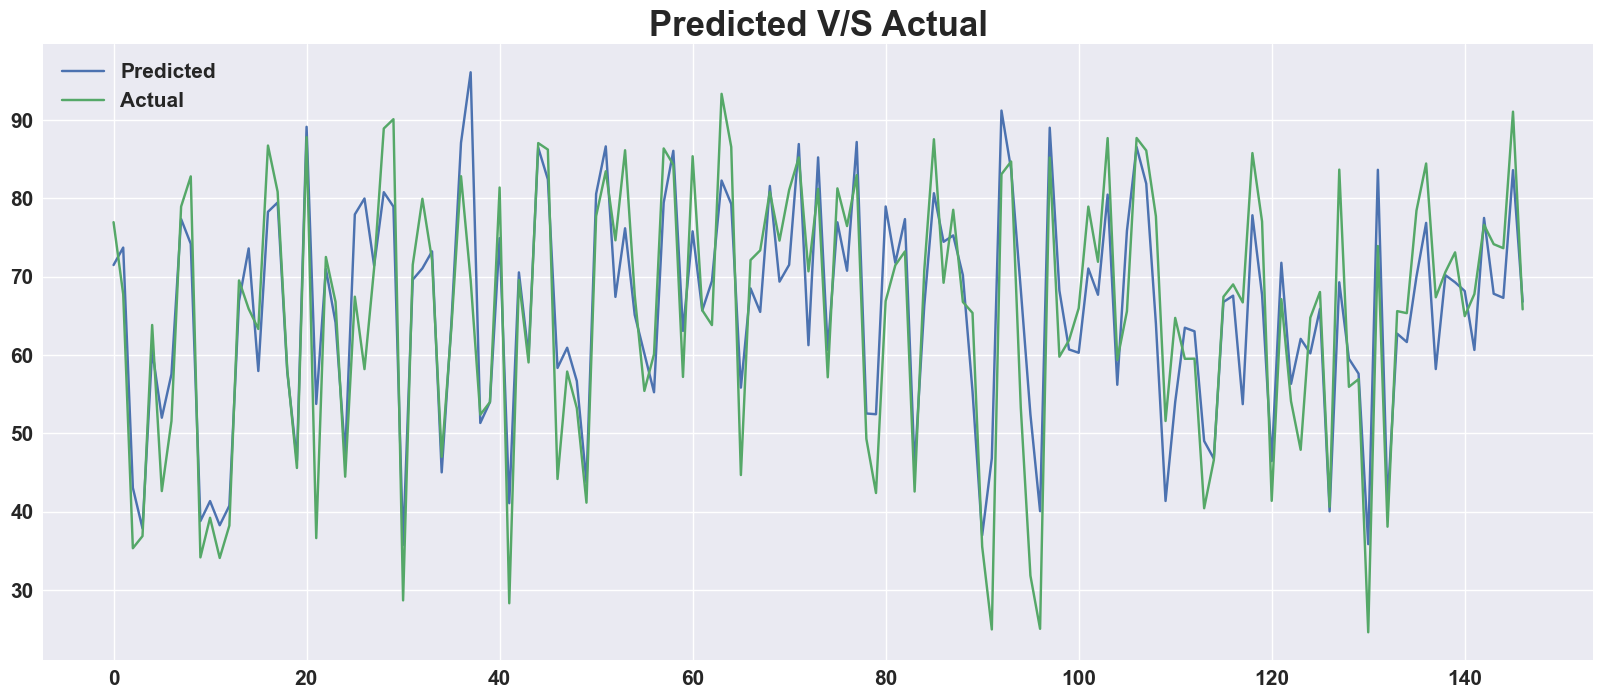

In [485]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

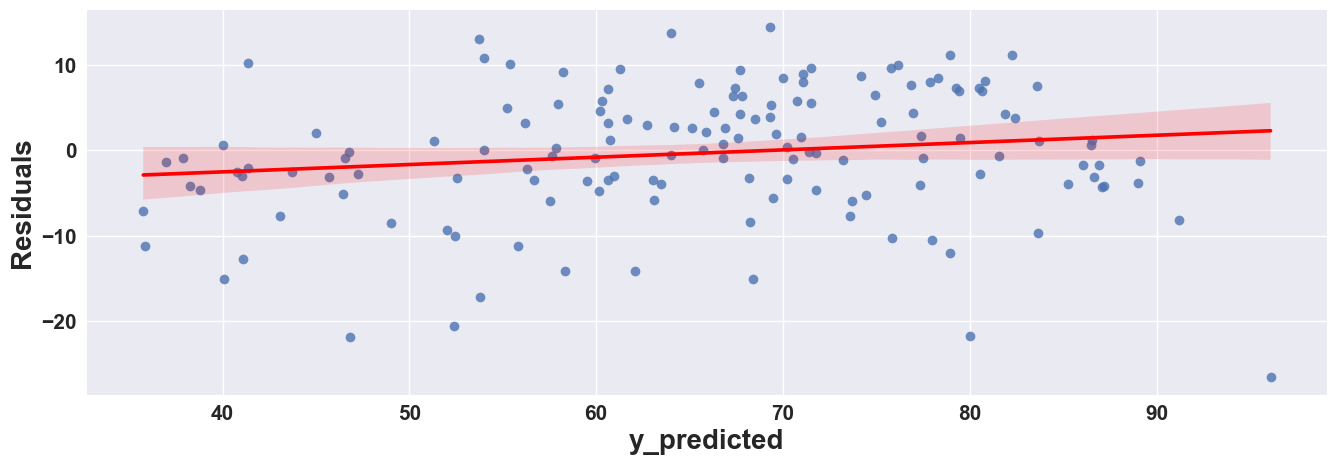

In [486]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

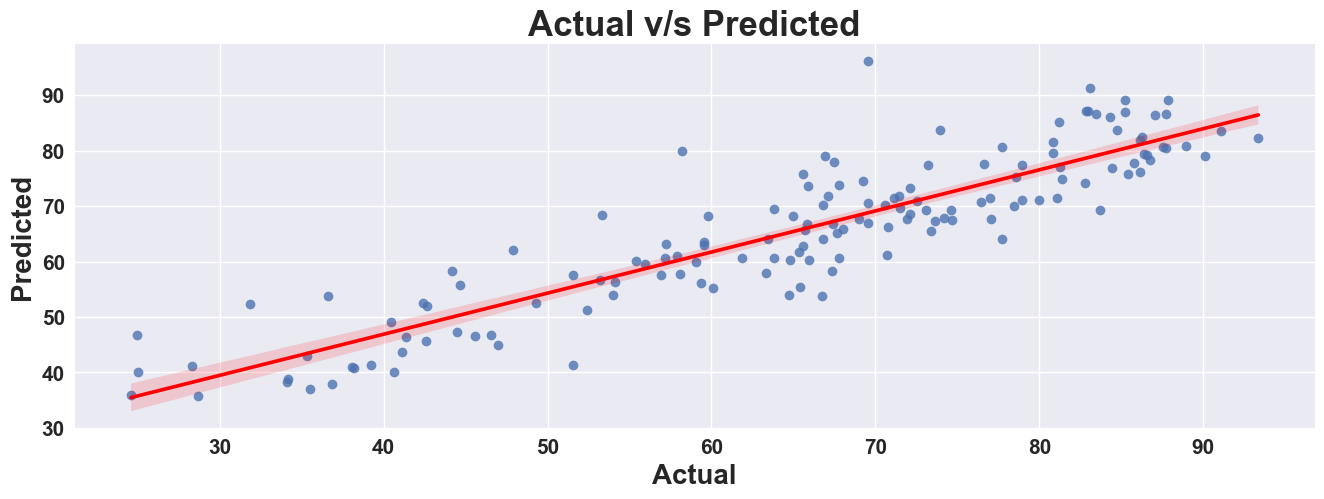

In [487]:
plot_scatter(y_pred,y_test)

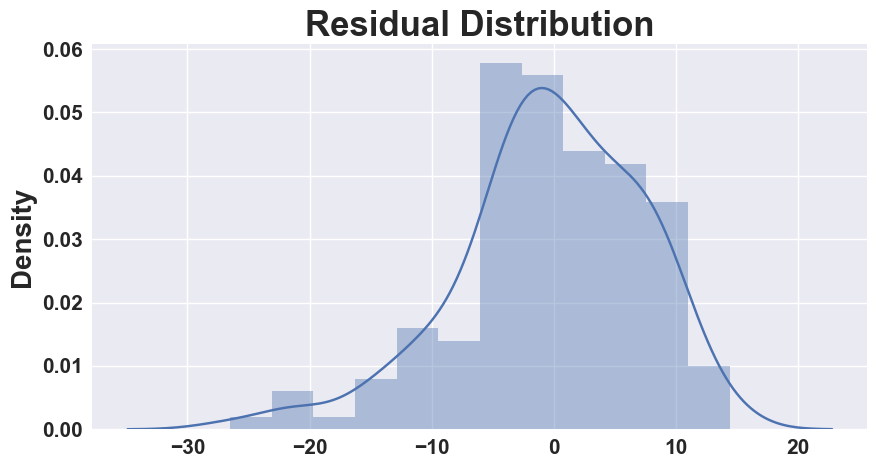

In [488]:
Residual_distPlot(y_pred,y_test)

### Decision Tree Regressor


In [491]:
from sklearn.tree import DecisionTreeRegressor

D_tree = DecisionTreeRegressor(max_depth=9, splitter='best', max_features=None)

D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [492]:
D_tree.score(X_test,y_test)

0.8457525795662374

In [493]:
y_pred_train = D_tree.predict(X_train)
y_pred = D_tree.predict(X_test)

In [495]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.602915696410985.
The Mean Squred Error(MSE) is 43.81491829572289.
The Root Mean Squared Error(RMSE) is 6.619283820453909.
The R2 Score is 0.8457525795662374.
Adjusted R2 is 0.8344108574755196.


In [496]:
test_dict = {'Model':"Decision Tree Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [497]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  \
0                      Linear Regression  5.8329  57.0794  7.5551    0.7991   
1                                  Lasso  5.8341  57.1906  7.5624    0.7987   
2             Ridge(GridsearchCv Tunned)  5.8329  57.0781  7.5550    0.7991   
3        ElasticNet(GridSearchCV-Tunned)  5.8329  57.0789  7.5551    0.7991   
4  Decision Tree Regressor(GridsearchCV)  4.6029  43.8149  6.6193    0.8458   

   Adjusted_R2  
0       0.7843  
1       0.7839  
2       0.7843  
3       0.7843  
4       0.8344

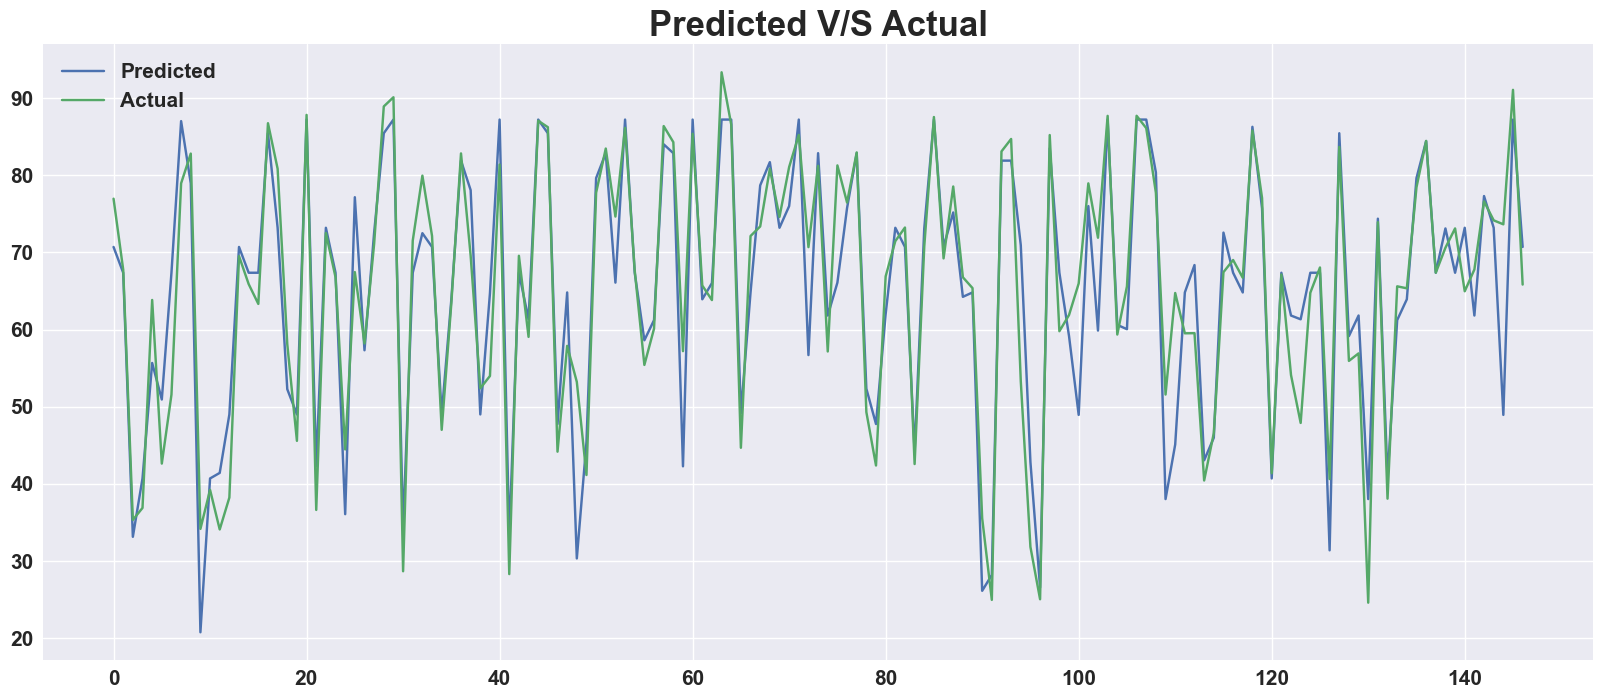

In [498]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

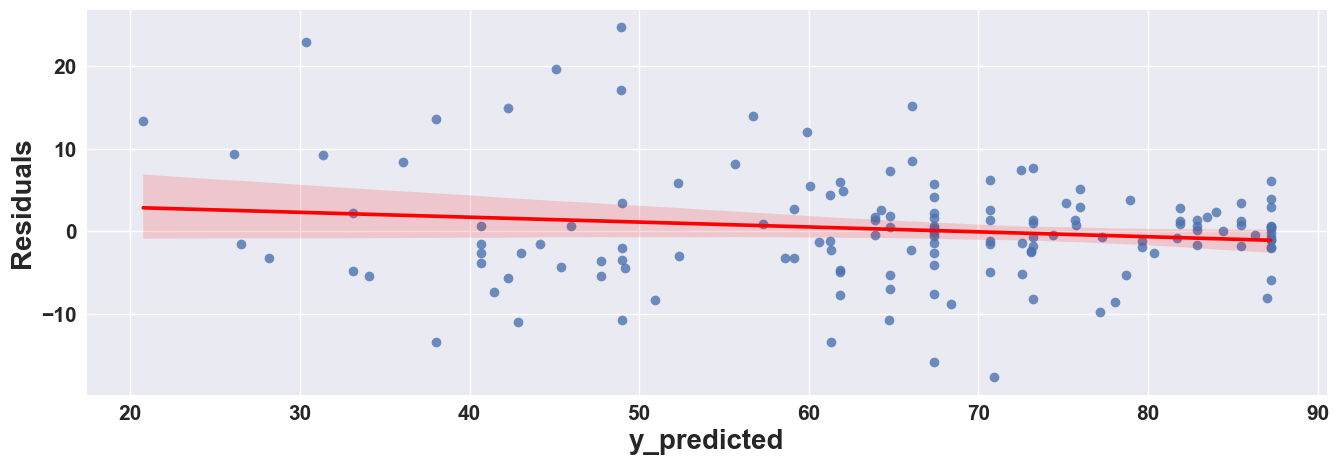

In [499]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

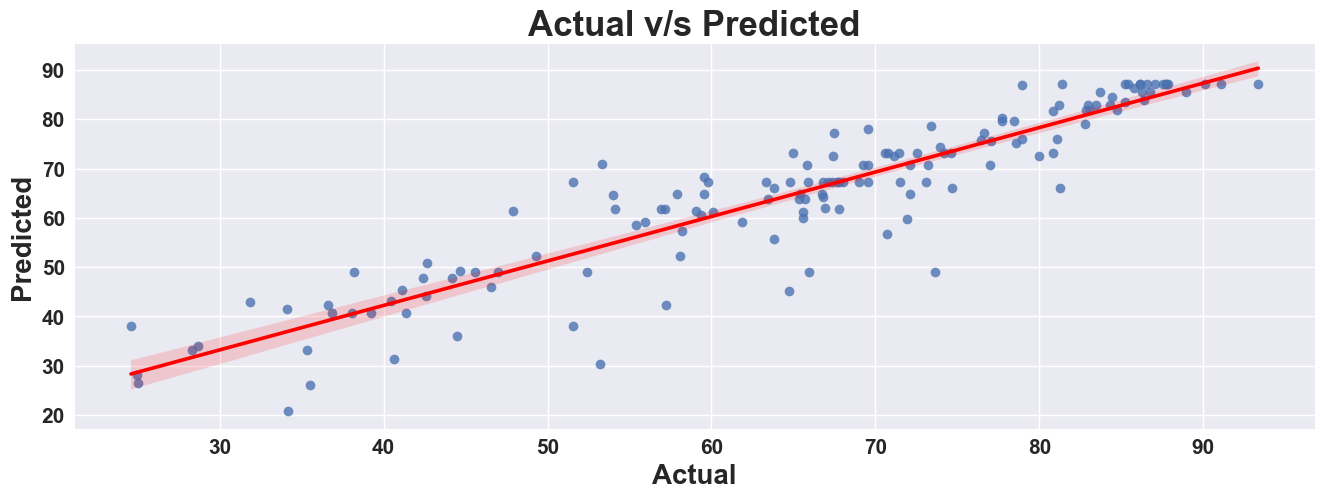

In [500]:
plot_scatter(y_pred,y_test)

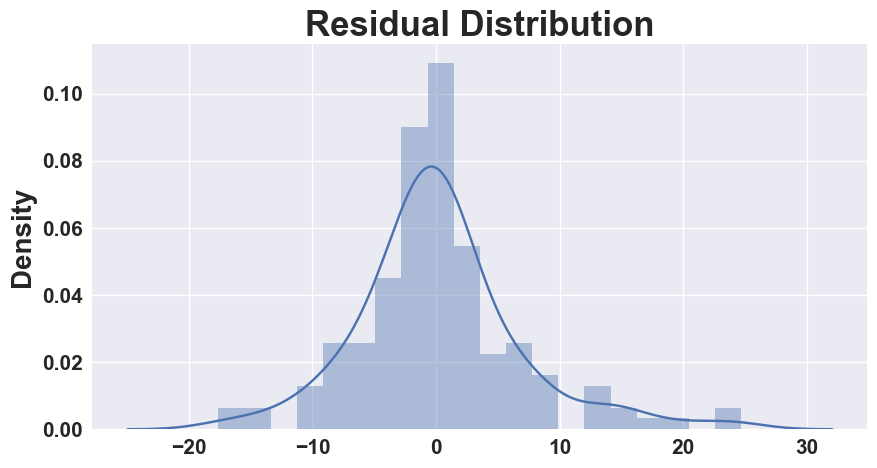

In [501]:
Residual_distPlot(y_pred,y_test)

In [ ]:
# print best parameters and best score
print(f'The best parameter is {tuning_model.best_params_}')
print(f'The best negative mean squred error value is {tuning_model.best_score_}')

The best parameter is {'criterion': 'squared_error', 'max_depth': 9, 'max_features': None}
The best negative mean squred error value is -5.267154984513726


In [508]:
tree = DecisionTreeRegressor()
parameters=parameters = parameters = {
    'criterion': ['squared_error', 'absolute_error'],  
    'max_depth': [5, 7, 9],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}


In [509]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42)

tuning_model = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 7, 9],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [510]:
print(f'The best parameter is {tuning_model.best_params_}')
print(f'The best negative mean squred error value is {tuning_model.best_score_}')

The best parameter is {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
The best negative mean squred error value is -58.440659245910346


In [513]:
from sklearn.tree import DecisionTreeRegressor

D_tree = DecisionTreeRegressor(max_depth=9, max_features=None, splitter='best', random_state=42)
D_tree.fit(X_train, y_train)

D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

Text(0.5, 0, 'Relative Importance')

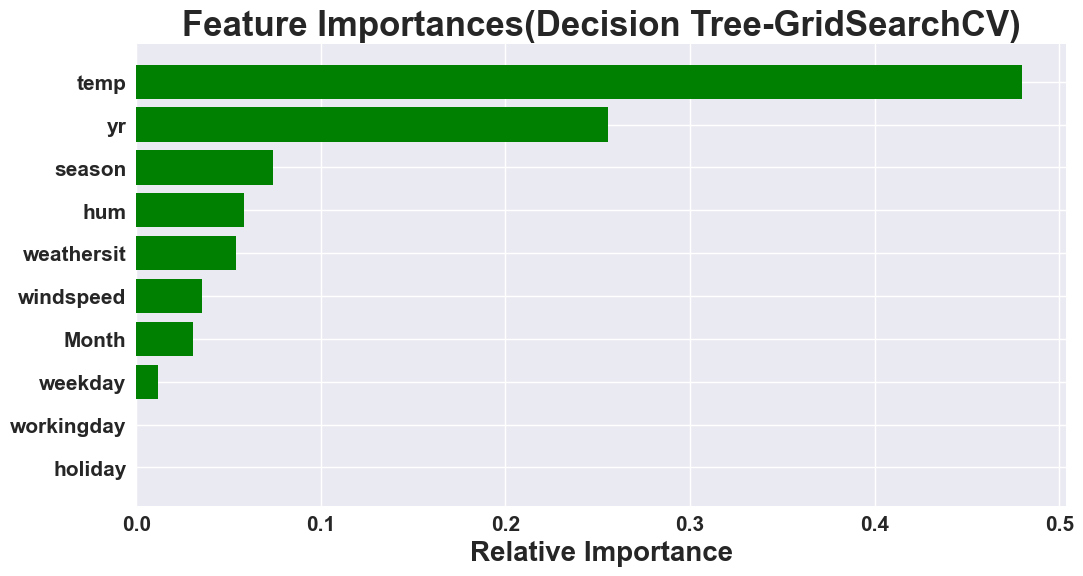

In [514]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Random Forest Regressor

In [515]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [516]:
rf.score(X_test,y_test)

0.868790476351148

In [517]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [519]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.2495035054994705.
The Mean Squred Error(MSE) is 37.27086353942556.
The Root Mean Squared Error(RMSE) is 6.104986776351408.
The R2 Score is 0.868790476351148.
Adjusted R2 is 0.8591427172593207.


In [520]:
test_dict = {'Model':"Random Forest Regressor",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [521]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  \
0                      Linear Regression  5.8329  57.0794  7.5551    0.7991   
1                                  Lasso  5.8341  57.1906  7.5624    0.7987   
2             Ridge(GridsearchCv Tunned)  5.8329  57.0781  7.5550    0.7991   
3        ElasticNet(GridSearchCV-Tunned)  5.8329  57.0789  7.5551    0.7991   
4  Decision Tree Regressor(GridsearchCV)  4.6029  43.8149  6.6193    0.8458   
5                Random Forest Regressor  4.2495  37.2709  6.1050    0.8688   

   Adjusted_R2  
0       0.7843  
1       0.7839  
2       0.7843  
3       0.7843  
4       0.8344  
5       0.8591

### GridSearchCV On Random Forest

In [522]:
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [523]:
rf_reg = RandomForestRegressor()
rf_tuning = GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [524]:
print(f'The best parameter is {rf_tuning.best_params_}')
print(f'The best negative mean squred error value is {rf_tuning.best_score_}')

The best parameter is {'max_depth': 9, 'n_estimators': 50}
The best negative mean squred error value is -38.73819194002923


In [525]:
rf_rg = RandomForestRegressor(max_depth= 9, n_estimators= 80)
rf_rg.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=80)

In [526]:
rf_rg.score(X_test,y_test)

0.8760440097651168

In [527]:
y_pred_train = rf_rg.predict(X_train)
y_pred = rf_rg.predict(X_test)

In [529]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.229015642876833.
The Mean Squred Error(MSE) is 35.21045323891873.
The Root Mean Squared Error(RMSE) is 5.933839670813388.
The R2 Score is 0.8760440097651168.
Adjusted R2 is 0.8669295987184342.


In [530]:
test_dict = {'Model':"Random Forest Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [531]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

Model     MAE      MSE    RMSE  R2_score  \
0                      Linear Regression  5.8329  57.0794  7.5551    0.7991   
1                                  Lasso  5.8341  57.1906  7.5624    0.7987   
2             Ridge(GridsearchCv Tunned)  5.8329  57.0781  7.5550    0.7991   
3        ElasticNet(GridSearchCV-Tunned)  5.8329  57.0789  7.5551    0.7991   
4  Decision Tree Regressor(GridsearchCV)  4.6029  43.8149  6.6193    0.8458   
5                Random Forest Regressor  4.2495  37.2709  6.1050    0.8688   
6  Random Forest Regressor(GridsearchCV)  4.2290  35.2105  5.9338    0.8760   

   Adjusted_R2  
0       0.7843  
1       0.7839  
2       0.7843  
3       0.7843  
4       0.8344  
5       0.8591  
6       0.8669

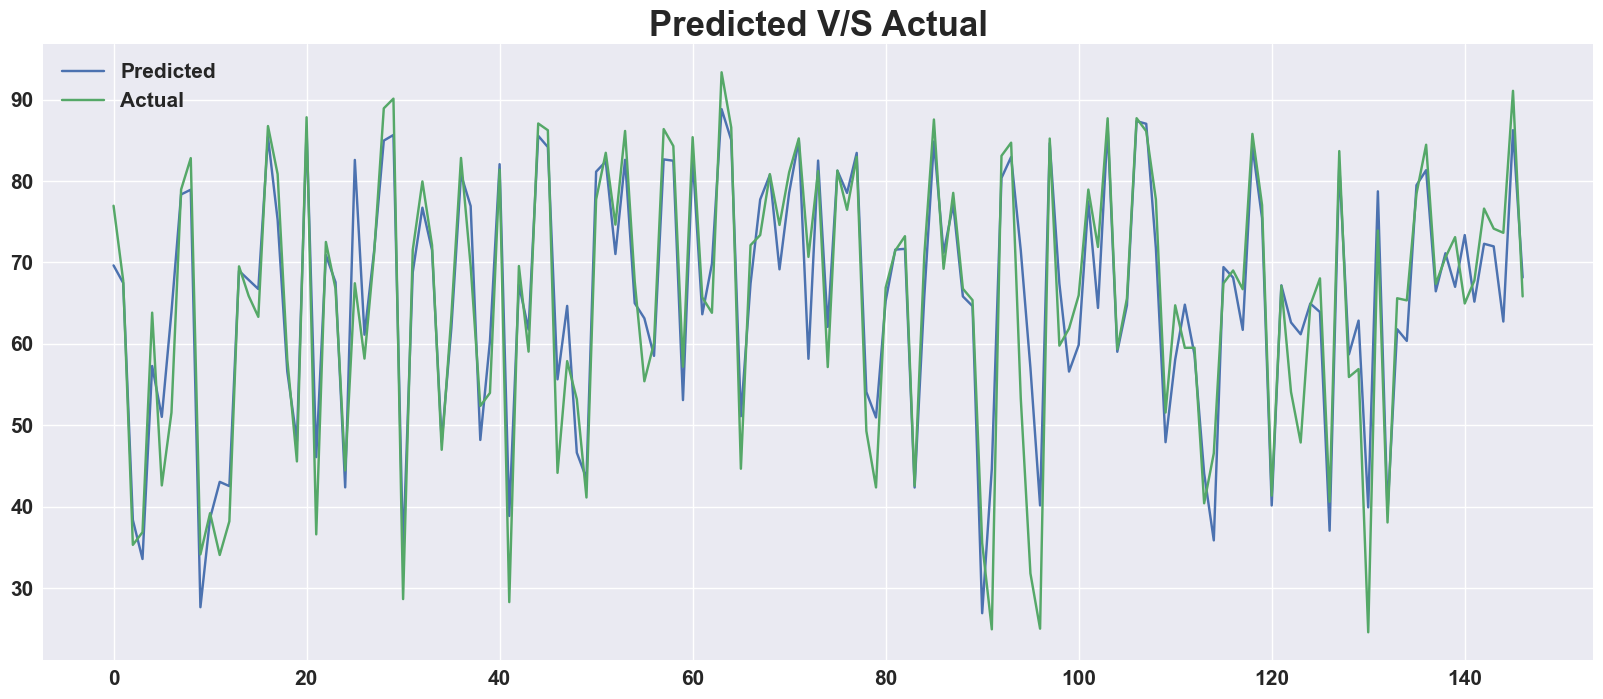

In [532]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

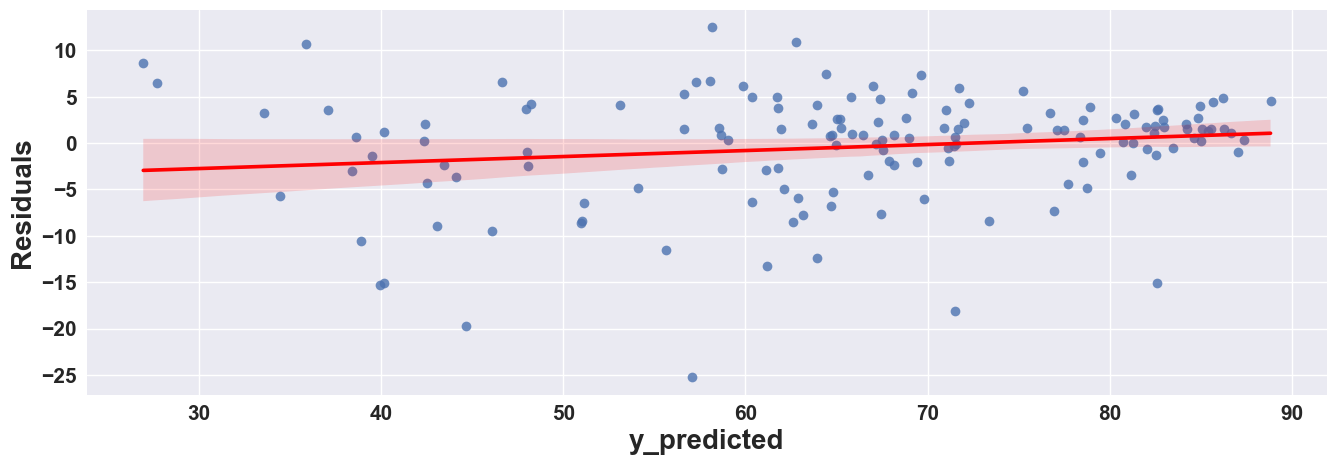

In [533]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

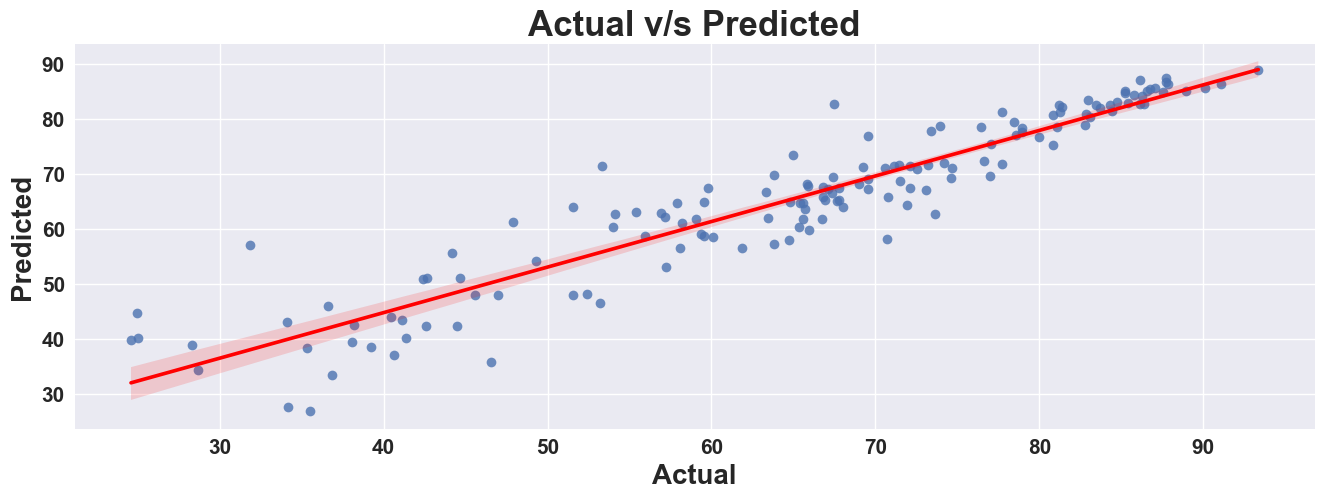

In [534]:
plot_scatter(y_pred,y_test)

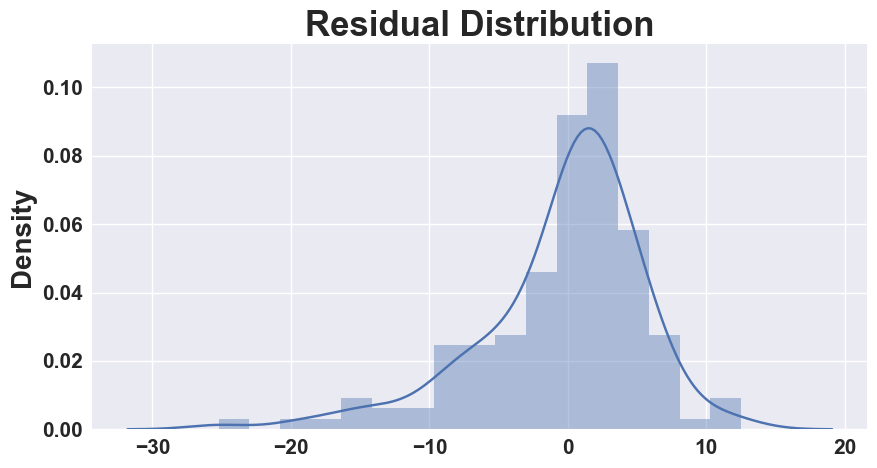

In [535]:
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

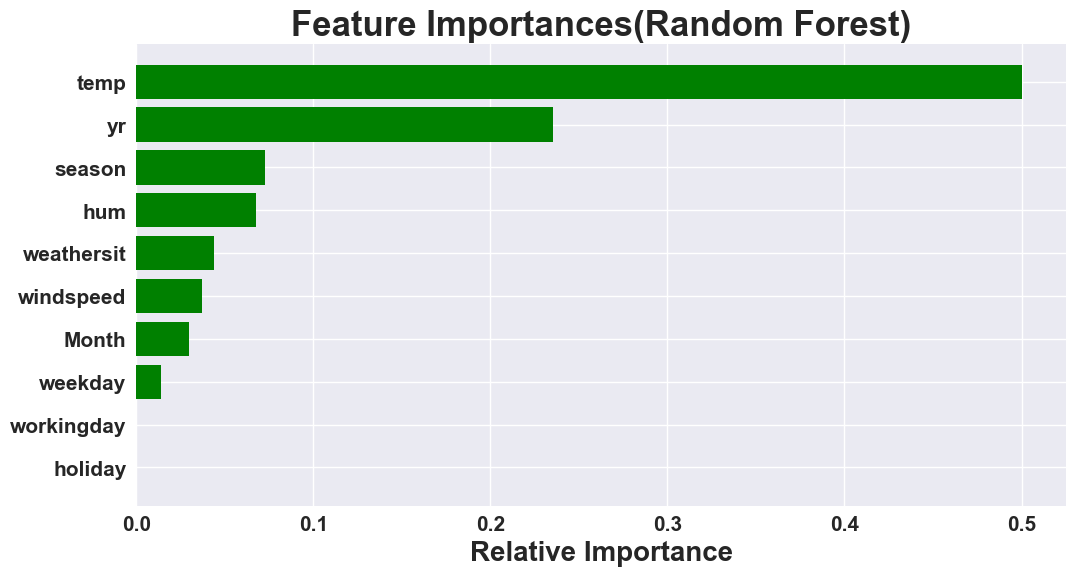

In [536]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Gradient Boosting

In [537]:
gradboo_reg = GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [538]:
gradboo_reg.score(X_test,y_test)

0.8705083889619158

In [539]:
y_pred_train = gradboo_reg.predict(X_train)
y_pred = gradboo_reg.predict(X_test)

In [541]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.486940754096386.
The Mean Squred Error(MSE) is 36.782880009663344.
The Root Mean Squared Error(RMSE) is 6.0648891176725845.
The R2 Score is 0.8705083889619158.
Adjusted R2 is 0.8609869469738214.


In [542]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [543]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


Model     MAE      MSE    RMSE  R2_score  \
0                      Linear Regression  5.8329  57.0794  7.5551    0.7991   
1                                  Lasso  5.8341  57.1906  7.5624    0.7987   
2             Ridge(GridsearchCv Tunned)  5.8329  57.0781  7.5550    0.7991   
3        ElasticNet(GridSearchCV-Tunned)  5.8329  57.0789  7.5551    0.7991   
4  Decision Tree Regressor(GridsearchCV)  4.6029  43.8149  6.6193    0.8458   
5                Random Forest Regressor  4.2495  37.2709  6.1050    0.8688   
6  Random Forest Regressor(GridsearchCV)  4.2290  35.2105  5.9338    0.8760   
7           Gardient boosting Regression  4.4869  36.7829  6.0649    0.8705   

   Adjusted_R2  
0       0.7843  
1       0.7839  
2       0.7843  
3       0.7843  
4       0.8344  
5       0.8591  
6       0.8669  
7       0.8610

### GridSearchCV on Gradient Boosting Regressor

In [544]:
gbr = GradientBoostingRegressor()

In [545]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [50,80,100,150],
               'max_depth'    : [4,6,8,10]}

In [546]:
grad_boo_tuning = GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
grad_boo_tuning.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [547]:
print(f'The best parameter is {grad_boo_tuning.best_params_}')
print(f'The best negative mean squred error value is {grad_boo_tuning.best_score_}')

The best parameter is {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.2}
The best negative mean squred error value is 0.8691809701085726


In [548]:
grad_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=150,
                          subsample=0.5)

In [549]:
grad_tuned.score(X_test,y_test)

0.8915642998012587

In [550]:
y_pred_train = grad_tuned.predict(X_train)
y_pred = grad_tuned.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 3.890005067797551.
The Mean Squred Error(MSE) is 30.801820420637643.
The Root Mean Squared Error(RMSE) is 5.549938776296333.
The R2 Score is 0.8915642998012587.
Adjusted R2 is 0.8835910865513513.


In [552]:
test_dict = {'Model':"Gradient Boosting Regression(GridSearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [553]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8329  57.0794  7.5551   
1                                       Lasso  5.8341  57.1906  7.5624   
2                  Ridge(GridsearchCv Tunned)  5.8329  57.0781  7.5550   
3             ElasticNet(GridSearchCV-Tunned)  5.8329  57.0789  7.5551   
4       Decision Tree Regressor(GridsearchCV)  4.6029  43.8149  6.6193   
5                     Random Forest Regressor  4.2495  37.2709  6.1050   
6       Random Forest Regressor(GridsearchCV)  4.2290  35.2105  5.9338   
7                Gardient boosting Regression  4.4869  36.7829  6.0649   
8  Gradient Boosting Regression(GridSearchCV)  3.8900  30.8018  5.5499   

   R2_score  Adjusted_R2  
0    0.7991       0.7843  
1    0.7987       0.7839  
2    0.7991       0.7843  
3    0.7991       0.7843  
4    0.8458       0.8344  
5    0.8688       0.8591  
6    0.8760       0.8669  
7    0.8705       0.8610  
8    0.8916       0.8836

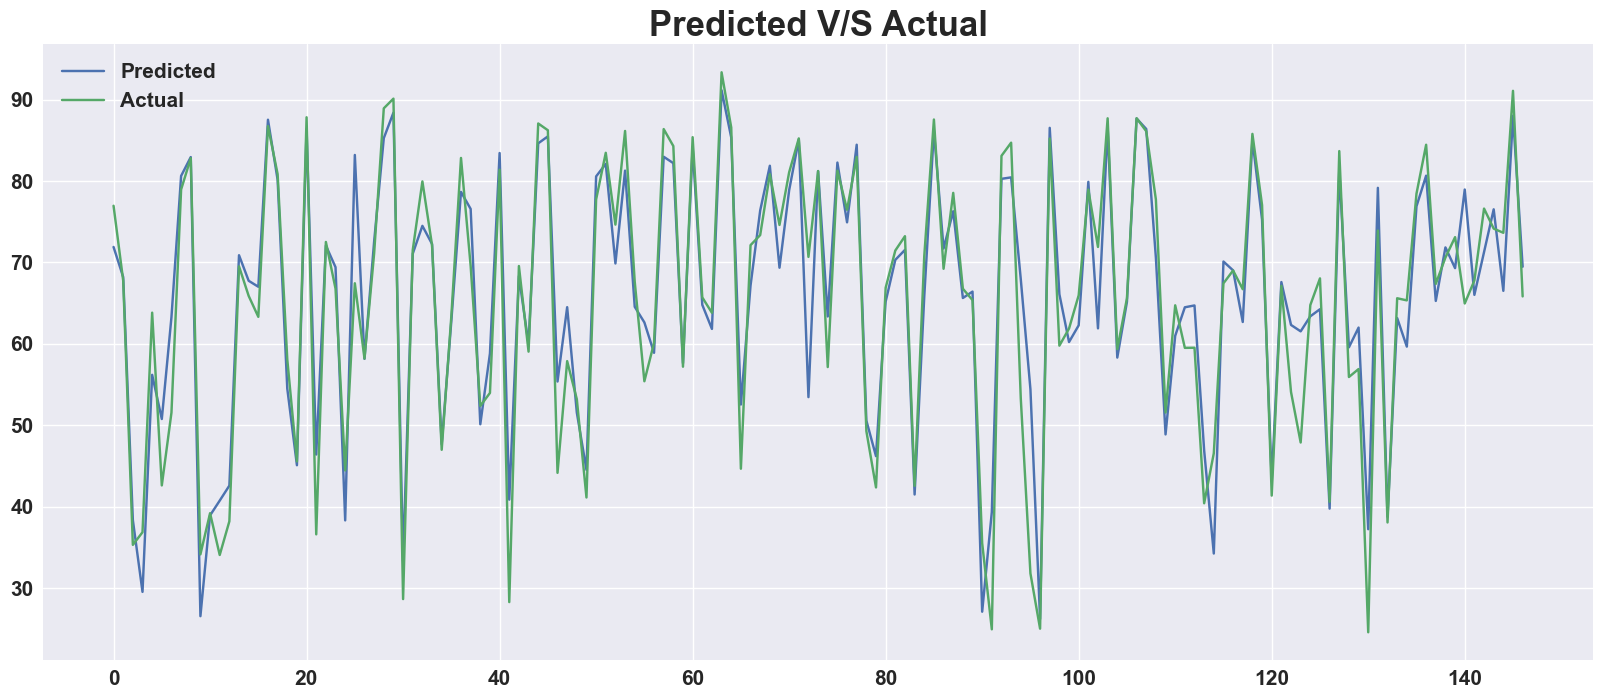

In [554]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

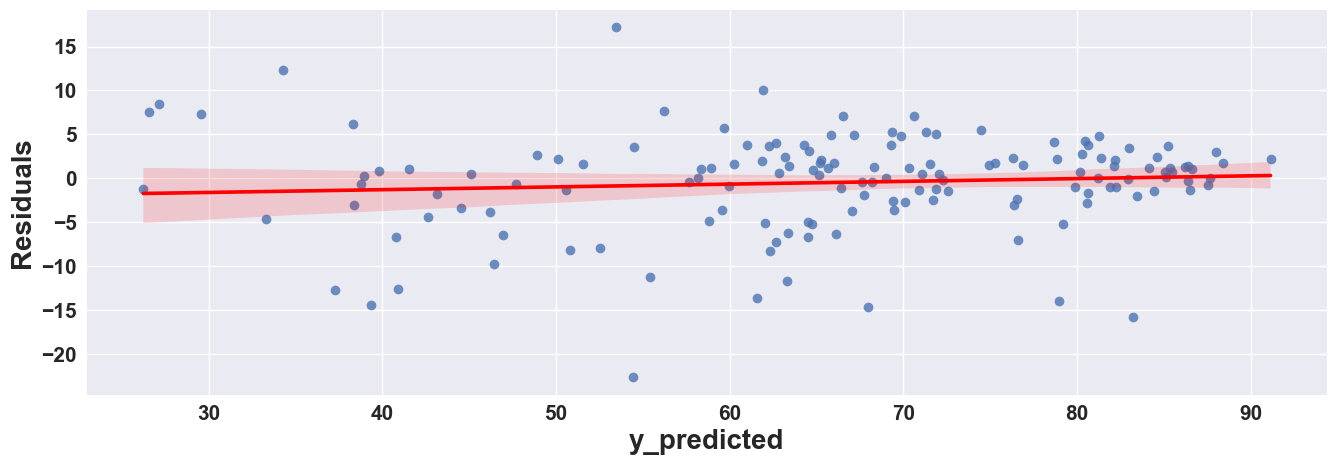

In [555]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

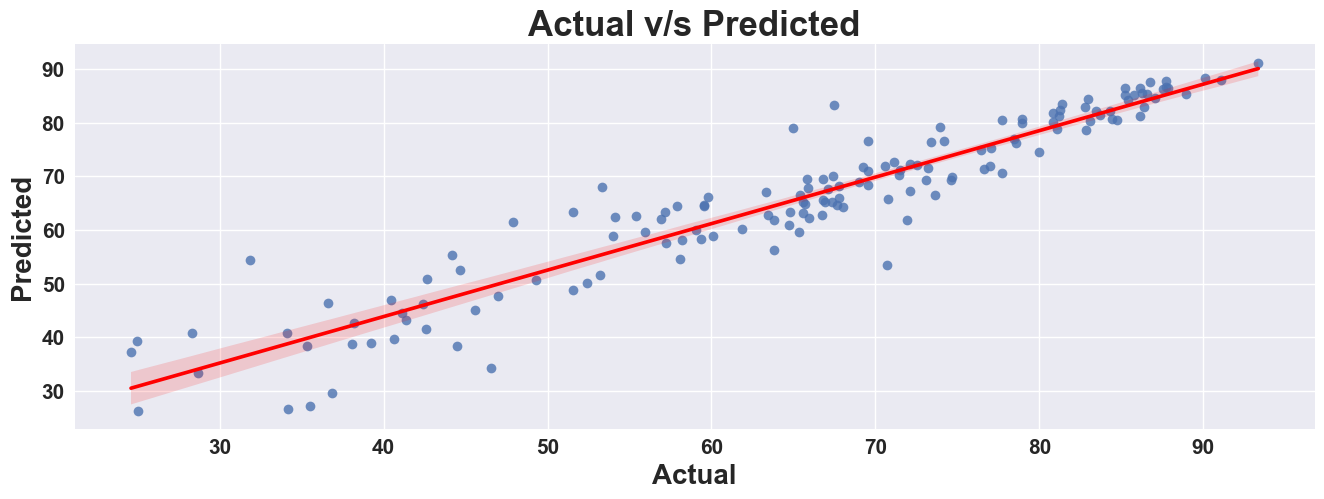

In [556]:
plot_scatter(y_pred,y_test)

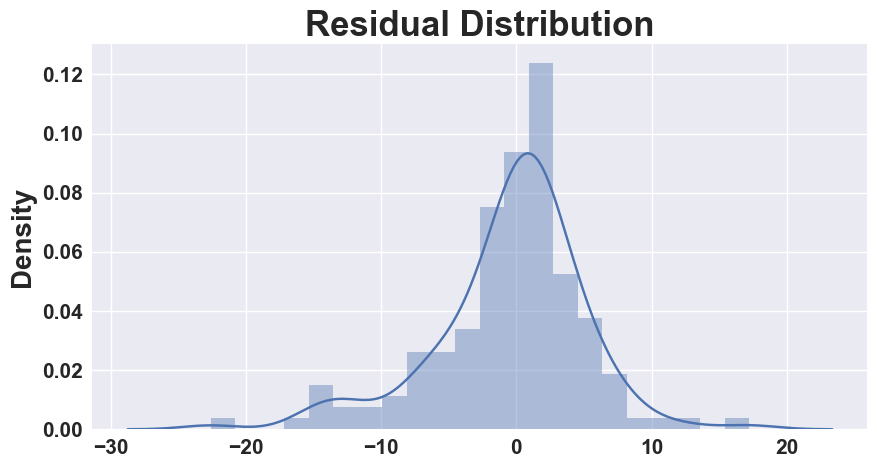

In [557]:
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

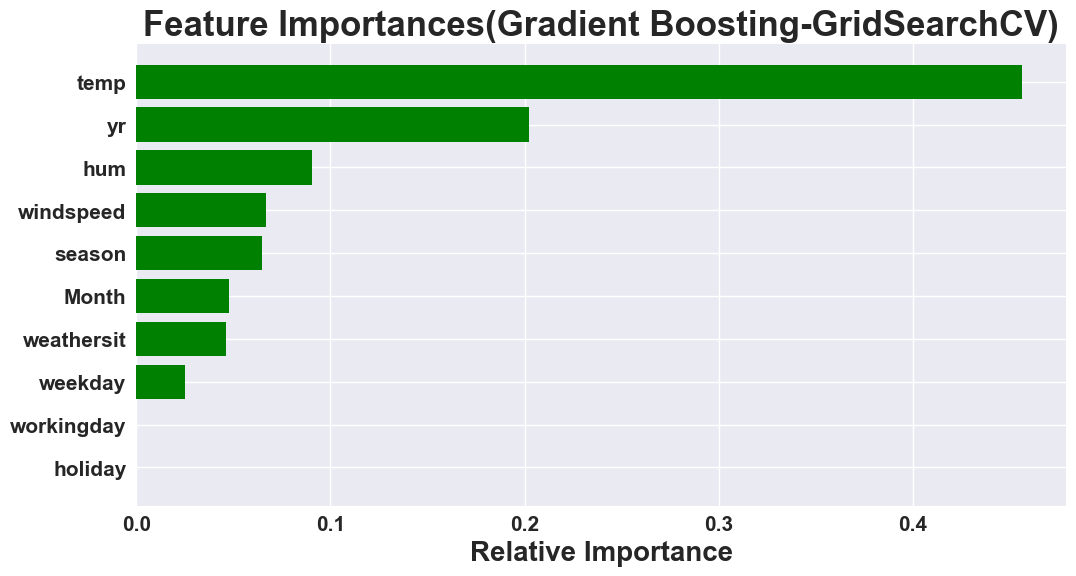

In [559]:
imp_variables=X.columns
importances = grad_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Conclusion
* As we have calculated MAE, MSE, RMS, R2_Score and  Adjusted_R2 score for each model. Based on Adjusted_R2 score will decide our model performance. 

# Linear,Lasso,Ridge and ElasticNet :-

* From The above data frame, we can see that linear, Lasso, Ridge  and Elasticnet regression models have almost similar Adjusted_R2 scores 78% (approx) on test data.(Even after using GridserachCV we have got similar results as of base models).
 
 # Decision Tree Regressor :-

* After hyperparameter tuning we got Adjusted_R2 score as 83% (approx) on test data which is quite good for us.

# Random Forest :-

* On Random Forest regressor model, without hyperparameter tuning we got Adjusted_R2 as 85% (approx) on test data .
* After hyperparameter tuning we got Adjusted_R2 score as 86% (approx) on test data which is  very good for us.

# Gradient Boosting Regression(Gradient Boosting Machine):

* On Gradient boosting regressor model, without hyperparameter tuning we got Adjusted_R2 as 86% (approx) on test data . Our model performed well without hyperparameter tuning.
* After hyperparameter tuning we got Adjusted_R2 score as 88% (approx) on test data,thus we improved the model performance by hyperparameter tuning.

### Thus Gradient Boosting Regression(GridSearchCV) and Random forest(gridSearchCv) gives good Adjusted_R2 scores. We can deploy this models.


In terms of features, Temperature and Year plays very important role in following 3 models. Other features importances are different in 3 models.

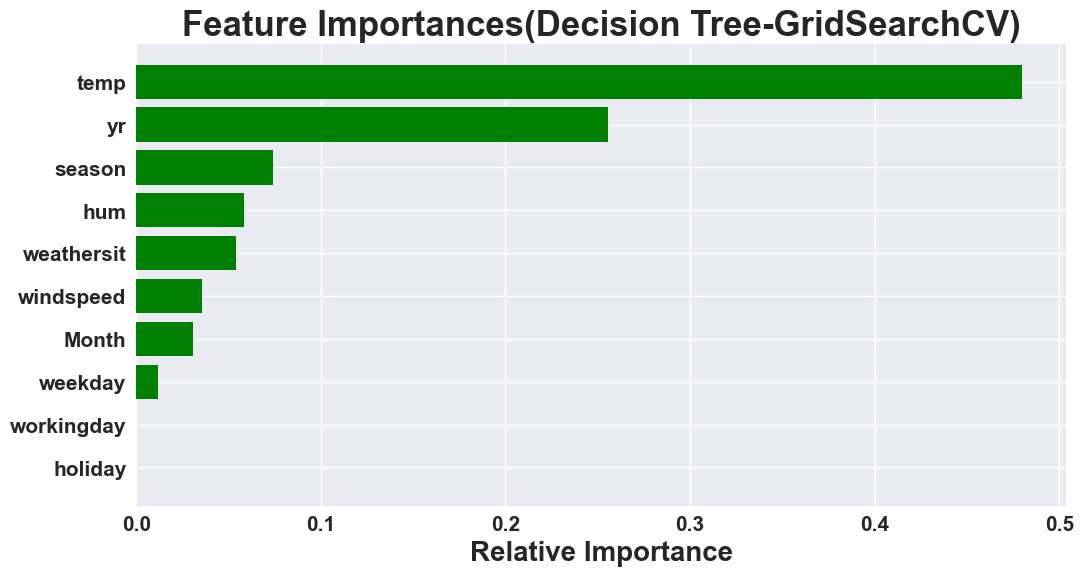

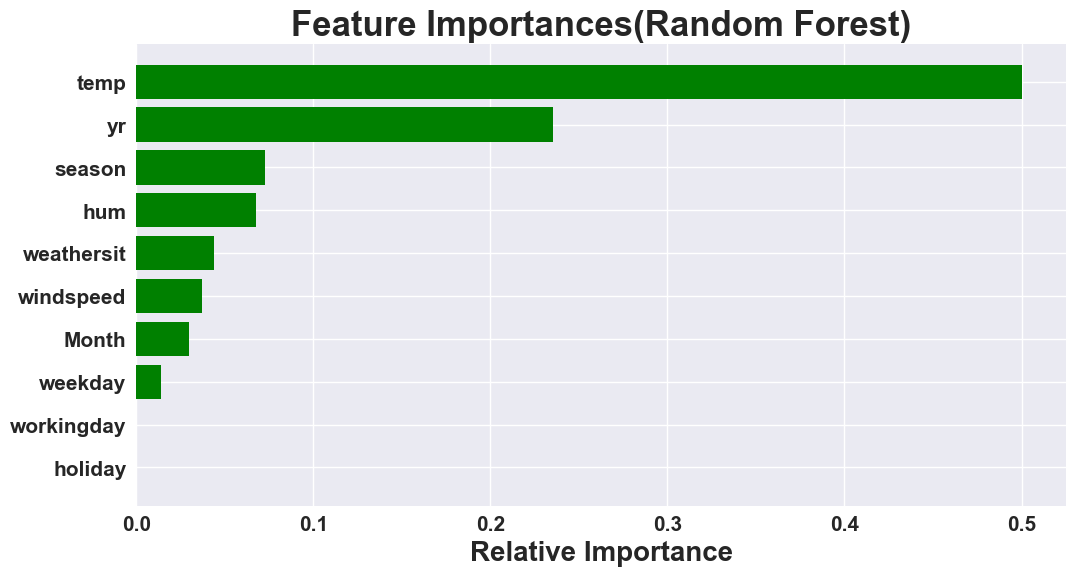

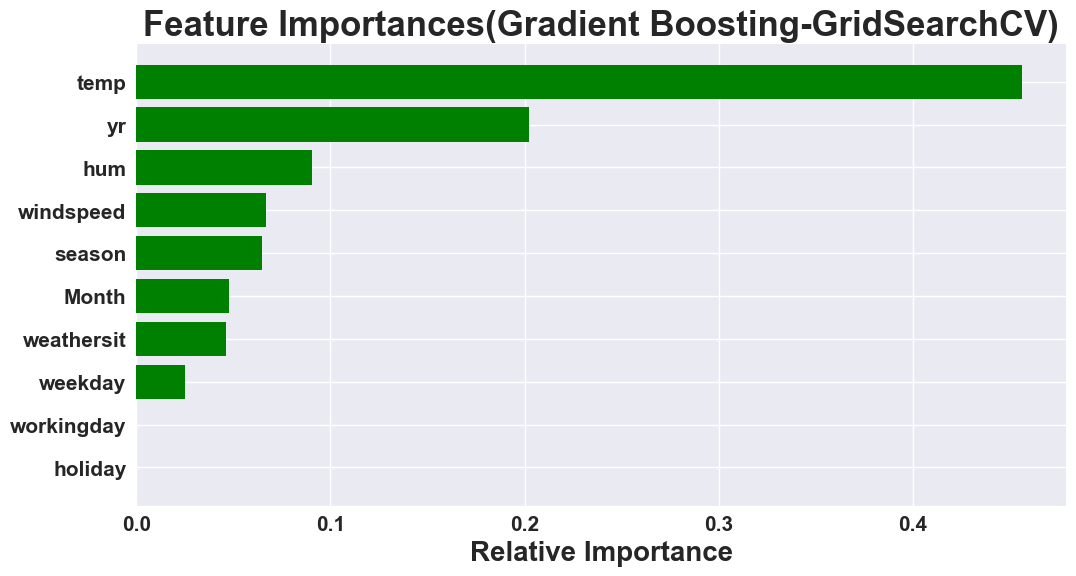

### Final Comaparison : -

In [560]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8329  57.0794  7.5551   
1                                       Lasso  5.8341  57.1906  7.5624   
2                  Ridge(GridsearchCv Tunned)  5.8329  57.0781  7.5550   
3             ElasticNet(GridSearchCV-Tunned)  5.8329  57.0789  7.5551   
4       Decision Tree Regressor(GridsearchCV)  4.6029  43.8149  6.6193   
5                     Random Forest Regressor  4.2495  37.2709  6.1050   
6       Random Forest Regressor(GridsearchCV)  4.2290  35.2105  5.9338   
7                Gardient boosting Regression  4.4869  36.7829  6.0649   
8  Gradient Boosting Regression(GridSearchCV)  3.8900  30.8018  5.5499   
9  Gradient Boosting Regression(GridSearchCV)  3.8900  30.8018  5.5499   

   R2_score  Adjusted_R2  
0    0.7991       0.7843  
1    0.7987       0.7839  
2    0.7991       0.7843  
3    0.7991       0.7843  
4    0.8458       0.8344  
5    0.8688       0.8591  
6    0.8760       0.8669  
7    0.8705       0.8610  
8    0.8916       0.8836  
9    0.8916       0.8836